 <font size="5"> **¿Qué vende un coche?** </font> 

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

A lo largo de éste proyecto vamos a embarcarnos con un solo objetivo:
  
**Determinar que factores influencian en el precio de un vehículo**
  
Para eso vamos a pasar por múltiples etapas para asegurarnos de sacar la conclusión más fiel posible. Nuestro enfoque será  general, por lo que vamos a buscar aprovechar el volumen de los datos para trabajar sobre casos comúnes descartando aquellos valores que se desvíen demasiado y nos alteren las conclusiones.
  
El orden que vamos a seguir es muy simple:
1. **Inicialización:** acá cargaremos las librerias que vamos a usar, los datos y daremos unas primeras vistas al df que vamos a tratar.
2. **Tratar valores ausentes:** como dice el titulo, vamos a buscar analizar y tratar las columnas con valores ausentes que encontremos en nuestro dataset.
3. **Corregir tipos de datos:** con los valores ausentes fuera de la mesa nos ocuparemos de corregir los tipos de datos, especialmente en el caso de columnas con valores ausentes que de haber; tendrán typo *float64*.
4. **Enriquecer los datos:** acá buscaremos obtener nuevas columnas en base a las que ya tenemos con el objetivo de obtener nuevas perspectivas de las publicaciones. Tambien vamos a realizar cualquier corrección final a los datos.
5. **Comprobar datos limpios:** Nada más que un ultimo vistazo al progreso que hicimos a lo largo del proyecto antes de embarcarnos a una nueva etapa.
6. **Estudiar paramtetros principales:** Acá vamos a definir cuales son las columnas numéricas principales, las que vamos a  curar y dejar óptimas para un análisis final. Obviamente, vamos a verificar el impacto de nuestros potenciales cambios en los datos antes de proceder.
7. **Periodo de colocación de anuncios:** Acá vamos a realizar un análisis sobre la cantidad de dias que las publicaciones se encontraron activas, como el resto del trabajo, vamos a buscar filtrar los datos atípicos y quedarnos con un grupo coherente y relativamente homogeneo.
8. **Precio promedio por cada tipo de vehículo:** Acá buscaremos cuales son los tipos de vehículos más comunes en nuestros datos para posteriormente sesgar nuestro trabajo sobre esos vehículos; como ya dijimos, para homogeneizar los datos a trabajar y poder realizar un análisis más objetivo.
9. **Factores de precio:** He aqui la culminacion de todo el trabajo previo, acá llegaremos con un dataframe altamente filtrado sin presencia de valores anómalos y en busqueda de observar, a traves de diferentes gráficos, la materia prima para finalmente contestar nuestra pregunta.
10. **Conclusión general:** En éste último paso reflexionaremos sobre todo el trayecto de nuestro proyecto. Posteriormente buscaremos llegar a una conclusión respecto a nuestro trabajo y formular una respuesta a nuestra pregunta en base a lo que observamos en los datos.
  
Con nuestro orden ya establecido, vamos allá!

**Table of contents**<a id='toc0_'></a>    
- [Inicialización](#toc1_)    
  - [Cargar datos](#toc1_1_)    
    - [Explorar datos iniciales](#toc1_1_1_)    
  - [Conclusiones y siguientes pasos](#toc1_2_)    
- [Tratar los valores ausentes](#toc2_)    
  - [Valores ausentes en `is_4wd`](#toc2_1_)    
  - [Valores ausentes en `odometer`](#toc2_2_)    
    - [Caso mercedes-benz benze sprinter 2500](#toc2_2_1_)    
  - [Valores ausentes en `model_year`](#toc2_3_)    
  - [Valores ausentes en `cylinders`](#toc2_4_)    
  - [Valores ausentes en `paint_color`](#toc2_5_)    
- [Corregir los tipos de datos](#toc3_)    
- [Enriquecer datos](#toc4_)    
- [Comprobar datos limpios](#toc5_)    
- [Estudiar parámetros principales](#toc6_)    
  - [Estudiar y tratar valores atípicos](#toc6_1_)    
  - [Estudiar parámetros principales sin valores atípicos](#toc6_2_)    
- [Periodo de colocación de los anuncios](#toc7_)    
- [Precio promedio por cada tipo de vehículo](#toc8_)    
- [Factores de precio](#toc9_)    
  - [¿Que vende un coche?](#toc9_1_)    
- [Conclusión general](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Inicialización](#toc0_)

Vamos a cargar pandas, numpy, matplotlib y seaborn, ya que son librerias esenciales para el trabajo optimo con datos

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## <a id='toc1_1_'></a>[Cargar datos](#toc0_)

Ahora vamos a cargar los datos en dos variables, una de las cuales vamos a dejar sin tocar por si debemos realizar una comparación con el df original.

In [2]:
# Carga el archivo de datos en un DataFrame
df0 = pd.read_csv('../datasets/vehicles_us.csv')
df = pd.read_csv('../datasets/vehicles_us.csv')

### <a id='toc1_1_1_'></a>[Explorar datos iniciales](#toc0_)

El dataset contiene los siguientes campos:
- `price` — precio publicado del vehiculo
- `model_year` — año del vehiculo
- `model` — marca y modelo del mismo
- `condition` — en que condicion se encuentra
- `cylinders` — cuántos cilindros tiene el vehiculo (no confundir con cilindrada)
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` — que tipo de transmision tiene
- `type` — de que tipo de vehiculo estamos hablando (SUV, camioneta, etc.)
- `paint_color` — el color del mismo
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [3]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Observamos como en las columnas `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd` hay datos faltantes. Eso causa que el dtype de la columna sea *float64* por la presencia de los NaN.
  
En el caso de `model_year`, `odometer`, `cylinders` y `is_4wd`, deberían ser *int64*. Mientras tanto `paint_color` deberia ser una columna *object*.
  
Por último, tambien hay que convertir la columna `date_posted` en *datetime*.

In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Notamos que `is_4wd` presenta por gran diferencia la mayor cantidad de valores nulos pero como ya dijimos en realidad esos valores nulos simplemente indican que ese vehiculo no tiene tracción integral.
  
Con eso en mente vemos que la siguiente columna con valores faltantes es `paint_color`, una columna que no será particularmente fácil de reemplazar a primera vista pero ya veremos que hacemos.
  
Despues vemos que `odometer` se ubica en un 3er puesto con 7343 filas diferentes. Varias columnas pueden incurrir al millaje de un vehículo y veremos a mejor detalle cuales eligiremos.
  
`cylinders` es la otra columna que le sigue en cantidad de valores ausentes y en la cual posiblemente usemos a `type` como guia para completarla.
  
Finalmente `model_year` es la columna que menos valores ausentes tiene, pero es la que a mi opinion puede ser 

In [6]:
# Ahora revisemos antes de trabajar por duplicados explícitos
df.duplicated().sum()

0

Eso es una buena noticia, con eso fuera del medio podemos avanzar tranquilos.

## <a id='toc1_2_'></a>[Conclusiones y siguientes pasos](#toc0_)

Como dijimos, llama la atención como varias columnas presentan dtype *float64* pero es evidente que eso se debe a que presentan valores Nan.
  
La unica tabla que se puede convertir sin más es `date_posted`, pero hasta que no tratemos los valores nulos en las otras columnas, la conversión no es una opcion.
  
Lo que haremos de ahora en adelante es ir analizando las diferentes columnas y buscando de que forma podremos reemplazar los datos faltantes en la tabla. Hay algunos que son fáciles de reemplazar como el caso de `is_4wd` y otros que hasta parecen imposibles como `paint_color`. Pero supongo que no sabremos si no empezamos a hacerlo.

# <a id='toc2_'></a>[Tratar los valores ausentes](#toc0_)



In [7]:
# Veamos las proporciones de nulos en cada columnas
100*df.isna().sum()/df.shape[0]

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [8]:
# Vamos a ver cuantos "nulos cruzados tenemos"
len(df[(df['odometer'].isna() == True) & (df['model_year'].isna() == True) & (df['cylinders'].isna() == True) & (df['paint_color'].isna() == True)])

9

Que tengamos 9 ciertamente llama la atención aunque lamentablemente esas 9 filas son completamente inútiles pues planeaba utilizar las otras columnas para poder rellenar las faltantes, especialmente `model_year` y `odometer`. Al faltarle 4 columnas, y encima ser 9 supongo que puedo descartarlas sin mucho problema.

In [9]:
# Ahora eliminemos esas filas
df.drop(df[(df['odometer'].isna() == True) & (df['model_year'].isna() == True) & (df['cylinders'].isna() == True) & (df['paint_color'].isna() == True)].index,inplace=True)
df.reset_index(inplace= True,drop=True)

In [10]:
# Vamos a verificar cuántas filas comparten éstas columnas nulas
df[(df['odometer'].isna() == True) & (df['model_year'].isna() == True)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,NaN,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51186,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51213,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,NaN,2018-12-09,23
51248,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-16,75
51286,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


Con 540 filas que comparten *model_year* y *odometer* nos encontramos en un dilema. Tendriamos que usar otros parametros para reemplazar esas filas en específicas, pero esas dos filas son clave a la hora de reemplazarse mutuamente e incluso para otras filas en una situación diferente.

## <a id='toc2_1_'></a>[Valores ausentes en `is_4wd`](#toc0_)

Primero vamos a comenzar con los valores ausentes más fáciles de reemplazar. En este caso los NaN simplemente representan que el vehiculo no tiene 4wd (4 wheel drive).

In [11]:
# No necesitamos mucho mas que ésto para tratar con la columna
df['is_4wd'].fillna(0,inplace=True)

In [12]:
# Verificamos
df['is_4wd'].isna().sum()

0

## <a id='toc2_2_'></a>[Valores ausentes en `odometer`](#toc0_)

Ahora vamos a pasar a ver la columna `odometer`. Para completarla vamos a tener que observar multiples columnas y verificar si efectivamente nos sirven a la hora de reemplazar los valores ausentes.

In [13]:
# Primero veamos cuantos valores faltantes tenemos
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51489,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51498,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51507,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51510,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


Sabemos que hay un total de 540 filas a las cuales no les puedo reemplazar `odometer` en base a `model_year` debido a que les faltan ambas columnas. Para ese caso vamos a usar la mediana de `model` ya que es coherente que dos vehiculos del mismo modelo tengan odometros similares.

In [14]:
# Primero vamos crear una tabla para obtener los valores por modelo
model_table = df[['model','odometer']].groupby('model').median()
model_table.reset_index(inplace= True)
model_table

,model,odometer
0,acura tl,141000.0
1,bmw x5,108500.0
2,buick enclave,113728.0
3,cadillac escalade,129176.0
4,chevrolet camaro,62655.5
...,...,...
95,toyota sienna,140715.0
96,toyota tacoma,125000.0
97,toyota tundra,120500.0
98,volkswagen jetta,107000.0


In [15]:
# Definimos una funcion que nos complete los valores de odometer en nuestras columnas problema
def replace_odo_no_year(row):
    odometer = row['odometer']
    model_year = row['model_year']
    if (pd.isna(model_year)) and (pd.isna(odometer)):
        return model_table.loc[model_table.model==row['model'],'odometer'].values[0]
    else:
        return row['odometer']

In [16]:
# Verificamos que todo funcione bien
print(len(df[(df['odometer'].isna())&(df['model_year'].isna())])) # Cuantas filas problema tenemos
print(len(df[(df['odometer'].isna())]))                           # Cuantas filas que les falta odometer tenemos
df.apply(replace_odo_no_year,axis=1).isna().sum()                 # Cuantas filas Nan nos quedan al final

540
7883


7349

Bueno, parece que tenemos unas 6 filas de diferencia que en sí no son muchas, pero claramente indican que algo está saliendo mal en la funcion. Vamos a revisar la tabla primero.

In [17]:
model_table[model_table['odometer'].isna()]

,model,odometer
73,mercedes-benz benze sprinter 2500,NaN


### <a id='toc2_2_1_'></a>[Caso mercedes-benz benze sprinter 2500](#toc0_)

In [18]:
# Lo que temia, entonces verifiquemos cuantos mercedes-benz ... tienen las columnas problema faltantes
df[(df['model'] == 'mercedes-benz benze sprinter 2500')&(df['odometer'].isna())&(df['model_year'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4149,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28
11541,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-05-28,24
25978,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,0.0,2018-06-06,37
31891,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,0.0,2018-05-21,59
34462,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-09,80
36514,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,0.0,2018-05-26,34


In [19]:
# 1, 2, 3, 4, 5... y 6... Eso es... llamativo para decir poco. Veamos ese autito... van en realidad
df[df['model'] == 'mercedes-benz benze sprinter 2500']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31
4149,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-10-02,32
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-11,34
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-09-24,45
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-09-16,47
11541,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-05-28,24


In [20]:
len(df[df['model'] == 'mercedes-benz benze sprinter 2500'])

40

Vemos que tenemos un total de 40 publicaciones de ese vehiculo con basicamente todos los datos iguales excepto `date_posted` y `days_listed`. Mi teoria es que es el mismo vehiculo publicado múltiples veces, baso mi teoría en que `days_listed` marca la cantidad de días que la publicación estuvo activa hasta que se eliminó; pero no implica que haya sido vendido.
  
El ultimo detalle que me queda fijarme es que no haya dos filas que hayan estado presentes en la página la mismo tiempo. Para eso tendremos que adelantarnos unos pasos y cambiar el *dtype* de `date_posted` ahora.

In [21]:
# Cambiemos el tipo de la columna
df['date_posted'] =  pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [22]:
# Verificamos
df.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [23]:
# Finalmente vemos de forma ordenada
df[df['model'] == 'mercedes-benz benze sprinter 2500'].sort_values('date_posted')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42111,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-05-18,50
31891,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,0.0,2018-05-21,59
36514,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,0.0,2018-05-26,34
42498,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-05-28,14
11541,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-05-28,24
25978,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,0.0,2018-06-06,37
23441,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-06-13,20
14796,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,0.0,2018-07-29,1
18811,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-03,52
48474,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-19,27


Viendo como no parecen ser diferentes publicaciones consecutivas vamos a rellenar todos los NaN con los valores que ya tenemos debido a que no tenemos datos suficientes para asumir nada más respecto a éste vehiculo.
  
Y en el caso de `odometer` vamos a usar la mediana de *van* ya que categorizarla por el tipo de vehiculo me parece lo apropiado a la hora de reemplazar los valores.

In [24]:
# Primero rellenamos 'model_year'
df.loc[(df.model == 'mercedes-benz benze sprinter 2500') & (df.model_year.isna()),'model_year'] = 2013

# Despues vamos por 'cylinders'
df.loc[(df.model == 'mercedes-benz benze sprinter 2500') & (df.cylinders.isna()),'cylinders'] = 6.0

# Ahora paint_color
df.loc[(df.model == 'mercedes-benz benze sprinter 2500') & (df.paint_color.isna()),'paint_color'] = 'black'

# Finalmente 'odometer', para eso vamos a usar una variable donde tengamos la mediana de las van
van_median = df.loc[df.type == 'van','odometer'].median()
df.loc[(df.model == 'mercedes-benz benze sprinter 2500') & (df.odometer.isna()),'odometer'] = van_median

# Por ultimo comprobemos
df.loc[df.model == 'mercedes-benz benze sprinter 2500',:]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-10-12,28
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-10-02,32
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-12-11,34
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-09-24,45
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-09-16,47
11541,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,123362.0,automatic,van,black,0.0,2018-05-28,24


Hermoso, bueno con el caso mercedes-benz fuera de la mesa vamos a proceder a seguir reemplazando `odometer`.

In [25]:
# Volvemos a verificar
print(len(df[(df['odometer'].isna())&(df['model_year'].isna())])) # Cuantas filas problema tenemos
print(len(df[(df['odometer'].isna())]))                           # Cuantas filas que les falta odometer tenemos
df.apply(replace_odo_no_year,axis=1).isna().sum()                 # Cuantas filas Nan nos quedan al final

534
7843


7309

Debido a la seguridad que tenemos en la columna `model` ahora mismo, vamos a utilizarla para reemplazar la columna `odometer` sin tantas vueltas.

In [26]:
# Con todo en orden ahora si vamos a reemplazar los valores faltantes en odometer
# Para eso vamos a utilizar la columna 'model'
def replace_odo(row):
    odometer = row['odometer']
    if pd.isna(odometer):
        return model_table.loc[model_table.model == row['model'],'odometer'].values[0]
    else:
        return row['odometer']

In [27]:
# Con la funcion hecha, vamos a reemplazar los valores de 'odometer'
df['odometer'] = df.apply(replace_odo,axis= 1)

# Verifiquemos
df['odometer'].isna().sum()

0

## <a id='toc2_3_'></a>[Valores ausentes en `model_year`](#toc0_)

Para el caso de `model_year` tenemos como posibilidad de usar la columna `odometer` o `model`. De usar `odometer` nos encontrariamos en una situacion en la que tendriamos que buscar el valor más cercano en una tabla y en base a eso reemplazar el año. Debido a que realizar tal función no solo tomaría demasiado tiempo de escribir sino tambien de correr vamos a ir por `model` que nos permitirá reemplazar con suficiente exactitud la columna `model_year`.

<Axes: >

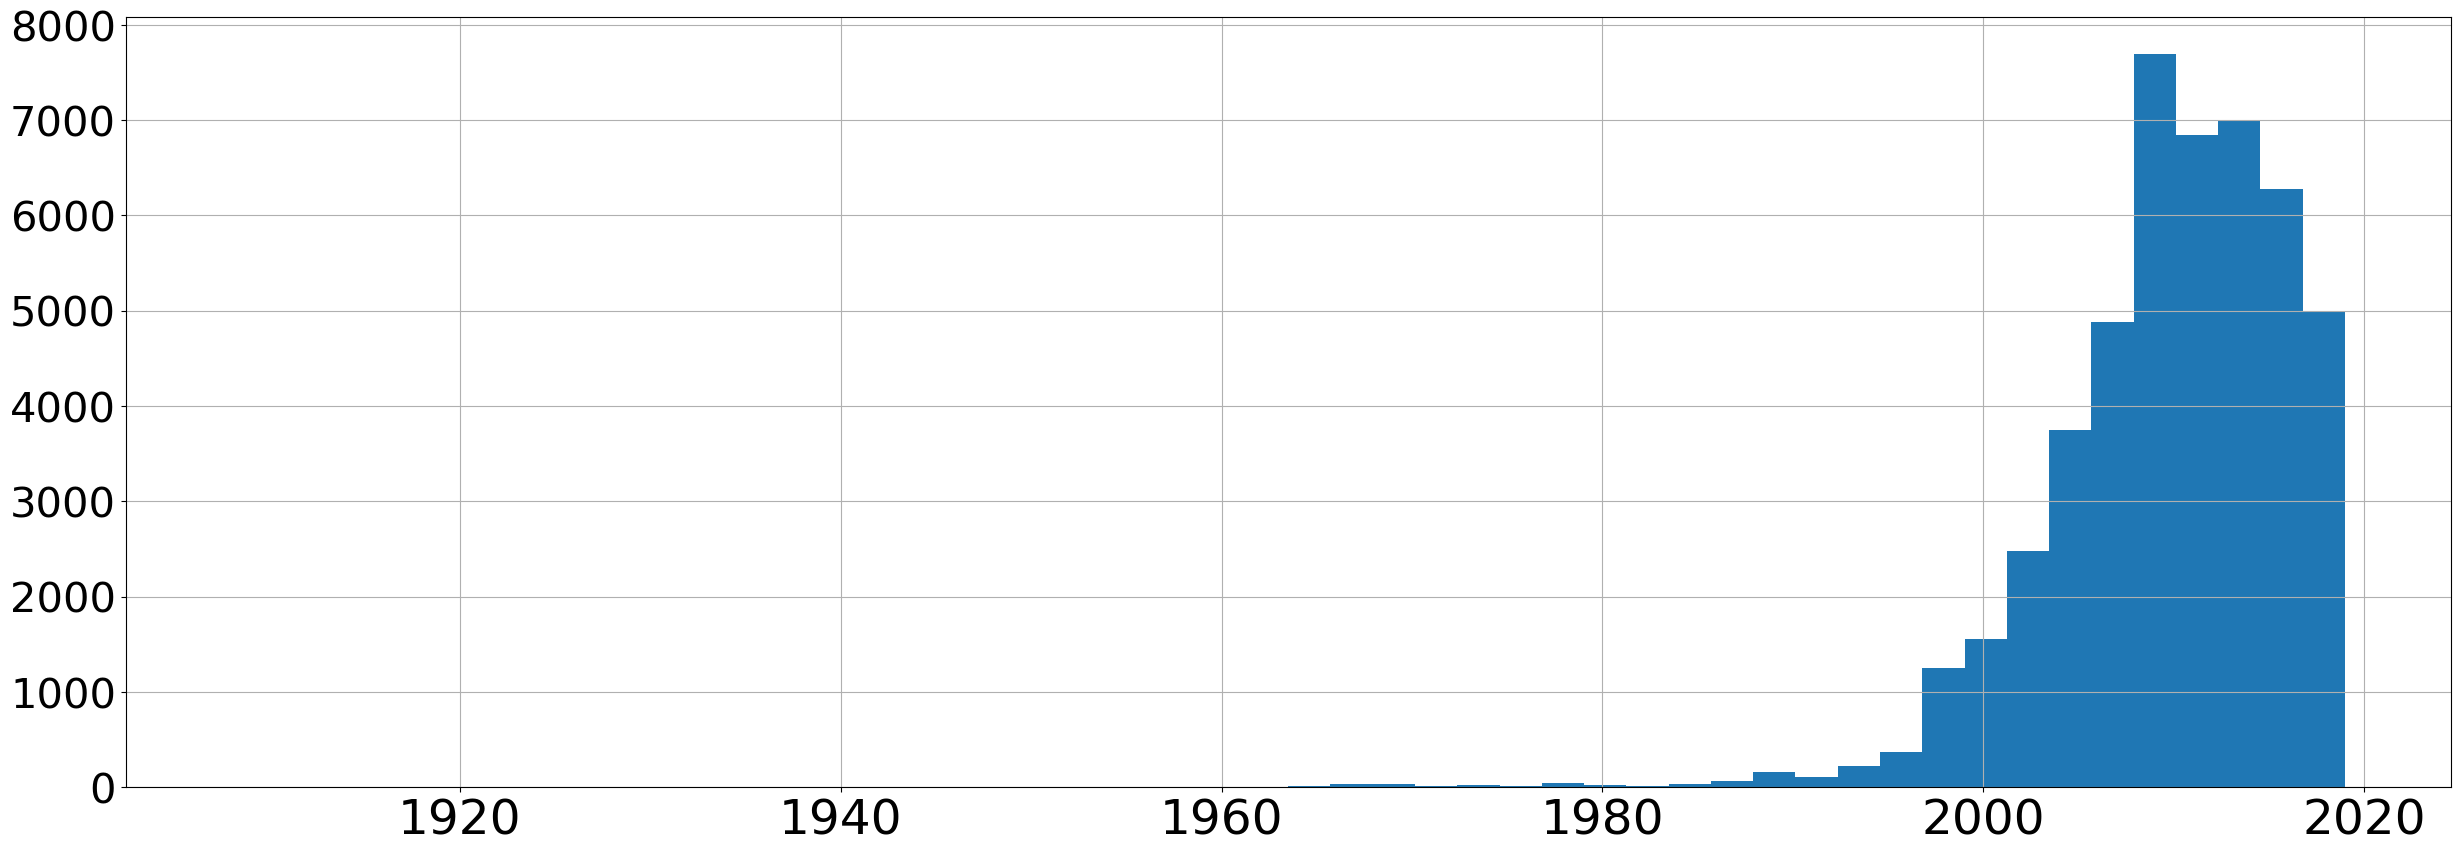

In [28]:
# Primero ojeamos un poco como se distribuye 'model_year'
df.loc[~df.model_year.isna(),:]['model_year'].hist(bins=50,figsize=(30,10),xlabelsize=35,ylabelsize=30)

Vemos como la columna `model_year` se encuentra principalmente entre 1995 y 2019, pero tambien notamos la presencia de valores atípicos con la cola que se escapa para los valores bajos.

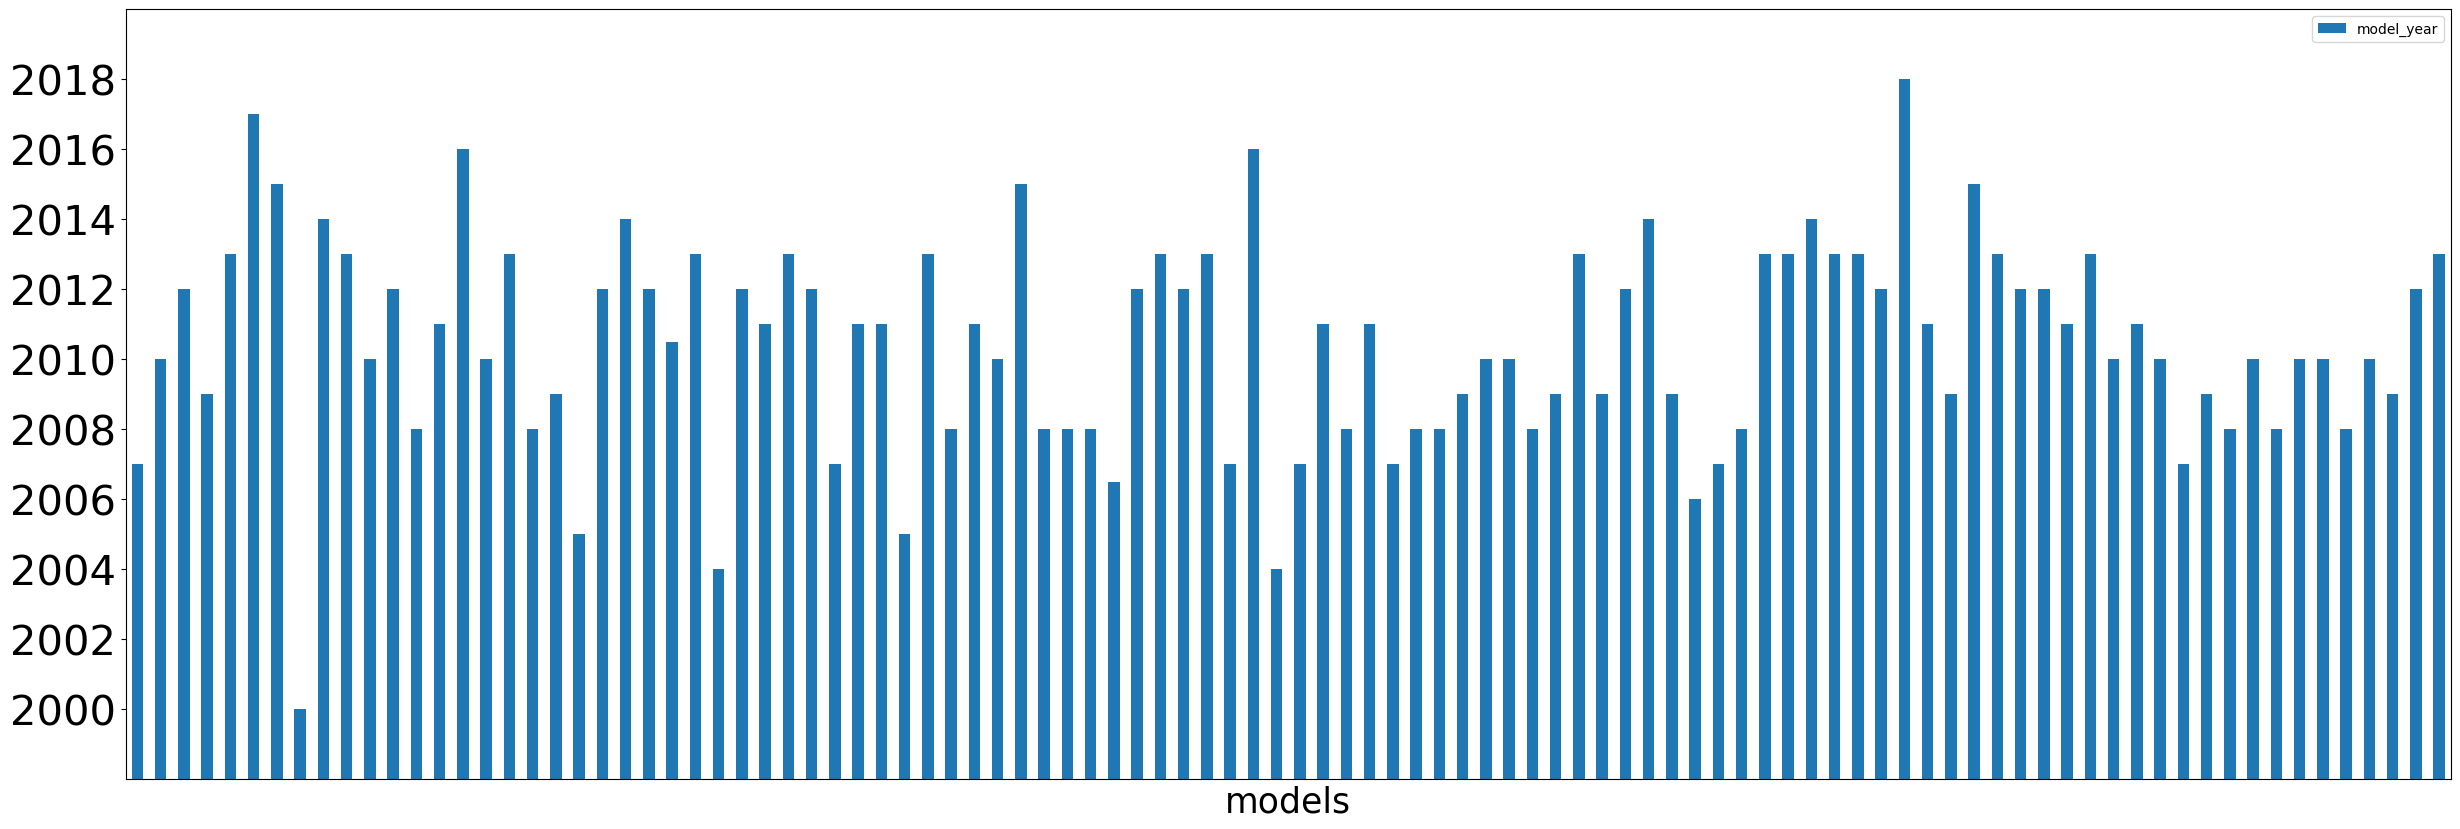

In [29]:
(df.loc[~df.model_year.isna(),['model','model_year']].groupby('model').median()
 .plot(kind='bar',figsize=(30,10)))
plt.yticks(ticks=range(2000,2020,2),fontsize=30)
plt.xticks(ticks=[])
plt.ylim((1998,2020))
plt.xlabel('models',size=25)
plt.show()

Decidí omitir los valores de *x* ya que al ser cadenas de texto no aportarían mucho y solo me interesaba ver bien si la mediana de algun modelo se escapaba del rango que me parecia normal.
  
Viendo que ningun valor se escapa de lo que representa a la mayoria de la tabla, vamos a seguir codeando.

In [30]:
# Primero guardamos la tabla de model_year/model en una variable 
year_table = df.loc[~df.model_year.isna(),('model_year','model')].groupby('model').median()
year_table.reset_index(inplace= True) # Reiniciamos el indice para trabajar más fácil
year_table

,model,model_year
0,acura tl,2007.0
1,bmw x5,2010.0
2,buick enclave,2012.0
3,cadillac escalade,2009.0
4,chevrolet camaro,2013.0
...,...,...
95,toyota sienna,2008.0
96,toyota tacoma,2010.0
97,toyota tundra,2009.0
98,volkswagen jetta,2012.0


In [31]:
# Definimos una funcion que nos permita reemplazar los nan en 'model_year'
def replace_year(row):
    year = row['model_year']
    if pd.isna(year):
        return year_table.loc[year_table.model== row['model'],'model_year'].values[0]
    else:
        return row['model_year']

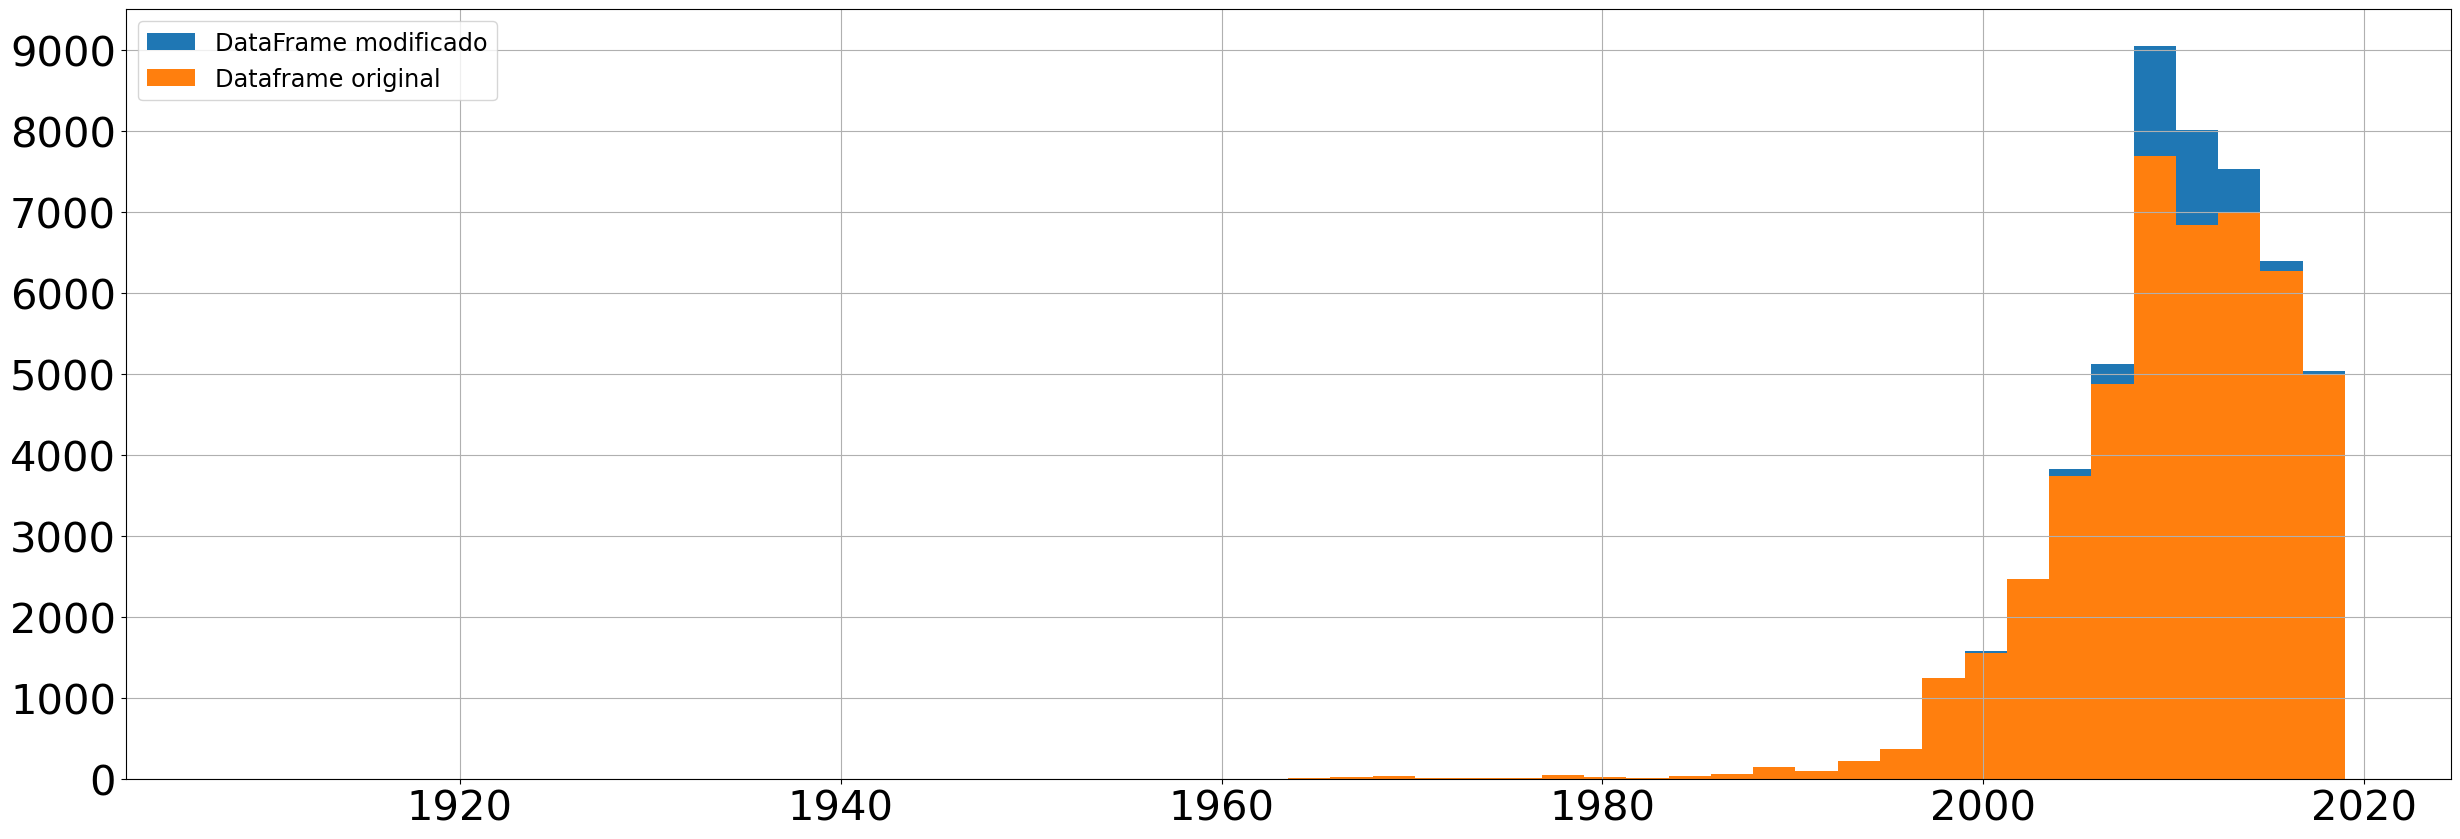

In [38]:
# Aplicamos la funcion y vemos que tanto cambia el dataset
df.apply(replace_year,axis=1).hist(bins=50,figsize=(30,10),label='DataFrame modificado')
df.loc[~df.model_year.isna(),'model_year'].hist(bins=50,figsize=(30,10),label='Dataframe original')
plt.xticks(fontsize= 30)
plt.yticks(ticks=range(0,10000,1000),fontsize= 30)
plt.legend(loc='upper left',fontsize='xx-large')
plt.show()

Sabemos que nuestro df sin modificar no llegaba a los 8000 por lo que es evidente que el naranja es el original. De lo que vemos, hemos sumado filas a las categorias más comunes seguramente acercando la media y la mediana. Dentro de todo haríamos que la columna `model_year` se comporte más como ya lo venia haciendo (si es que esa oración tiene sentido). Viendo que no cambiamos el df de una manera drástica, vamos a proceder a efectuar el cambio.

In [37]:
# Aplicamos el cambio
df['model_year'] = df.apply(replace_year,axis=1)

In [38]:
# Revisamos
df['model_year'].isna().sum()

0

Y con eso terminamos de reemplazar la columna `model_year`, ahora podemos proceder a la siguiente columna.

## <a id='toc2_4_'></a>[Valores ausentes en `cylinders`](#toc0_)

Para el caso de `cylinders` vamos a dejar en paz a nuestra columna `model` para enfocarnos en la columna `type`. El motivo se basa en que ,por ejemplo, un auto de ciudad es más común que tenga 4 cilindros, una camioneta o un SUV 6 u 8 y un camion seguramente 10.
  
Primero vamos a revisar algo que seguramente no se dé y es ver si todos los vehiculos de una categoría poseen la misma cantidad de cilindros.

In [39]:
# Primero hagamos una variable en la que tengamos todas las filas que le faltan cilindros
na_cylinders = df.loc[df.cylinders.isna(),:]
na_cylinders

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51420,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,0.0,2018-07-02,25
51433,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51451,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51468,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


In [40]:
# Dado que type es una palabra reservada de Python, vamos a cambiar el nombre de la columna a catg (category)
df.rename(columns={'type':'catg'},inplace=True)

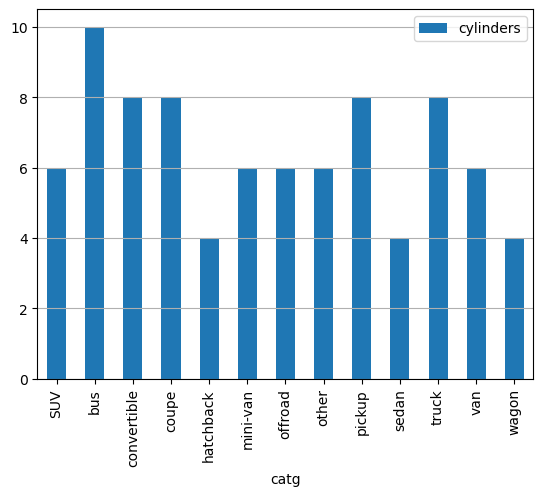

In [41]:
# Veamos cuales son los valores de cilindrada más comunes por categoría
df.loc[:,['catg','cylinders']].groupby('catg').agg(pd.Series.mode).plot(kind='bar')
plt.grid(visible=True,axis= 'y')
plt.show()

In [42]:
# Parecen bastante coherentes así que vamos a hacer una tabla para reemplazar despues
type_table = df.loc[:,['catg','cylinders']].groupby('catg').agg(pd.Series.mode)
type_table.reset_index(inplace=True)

In [43]:
# Definimos una función para reemplazar los valores en la tabla general
def replace_cylinders(row):
    cylinders = row['cylinders']
    if pd.isna(cylinders):
        return type_table.loc[type_table.catg== row['catg'],'cylinders'].values[0]
    else:
        return row['cylinders']

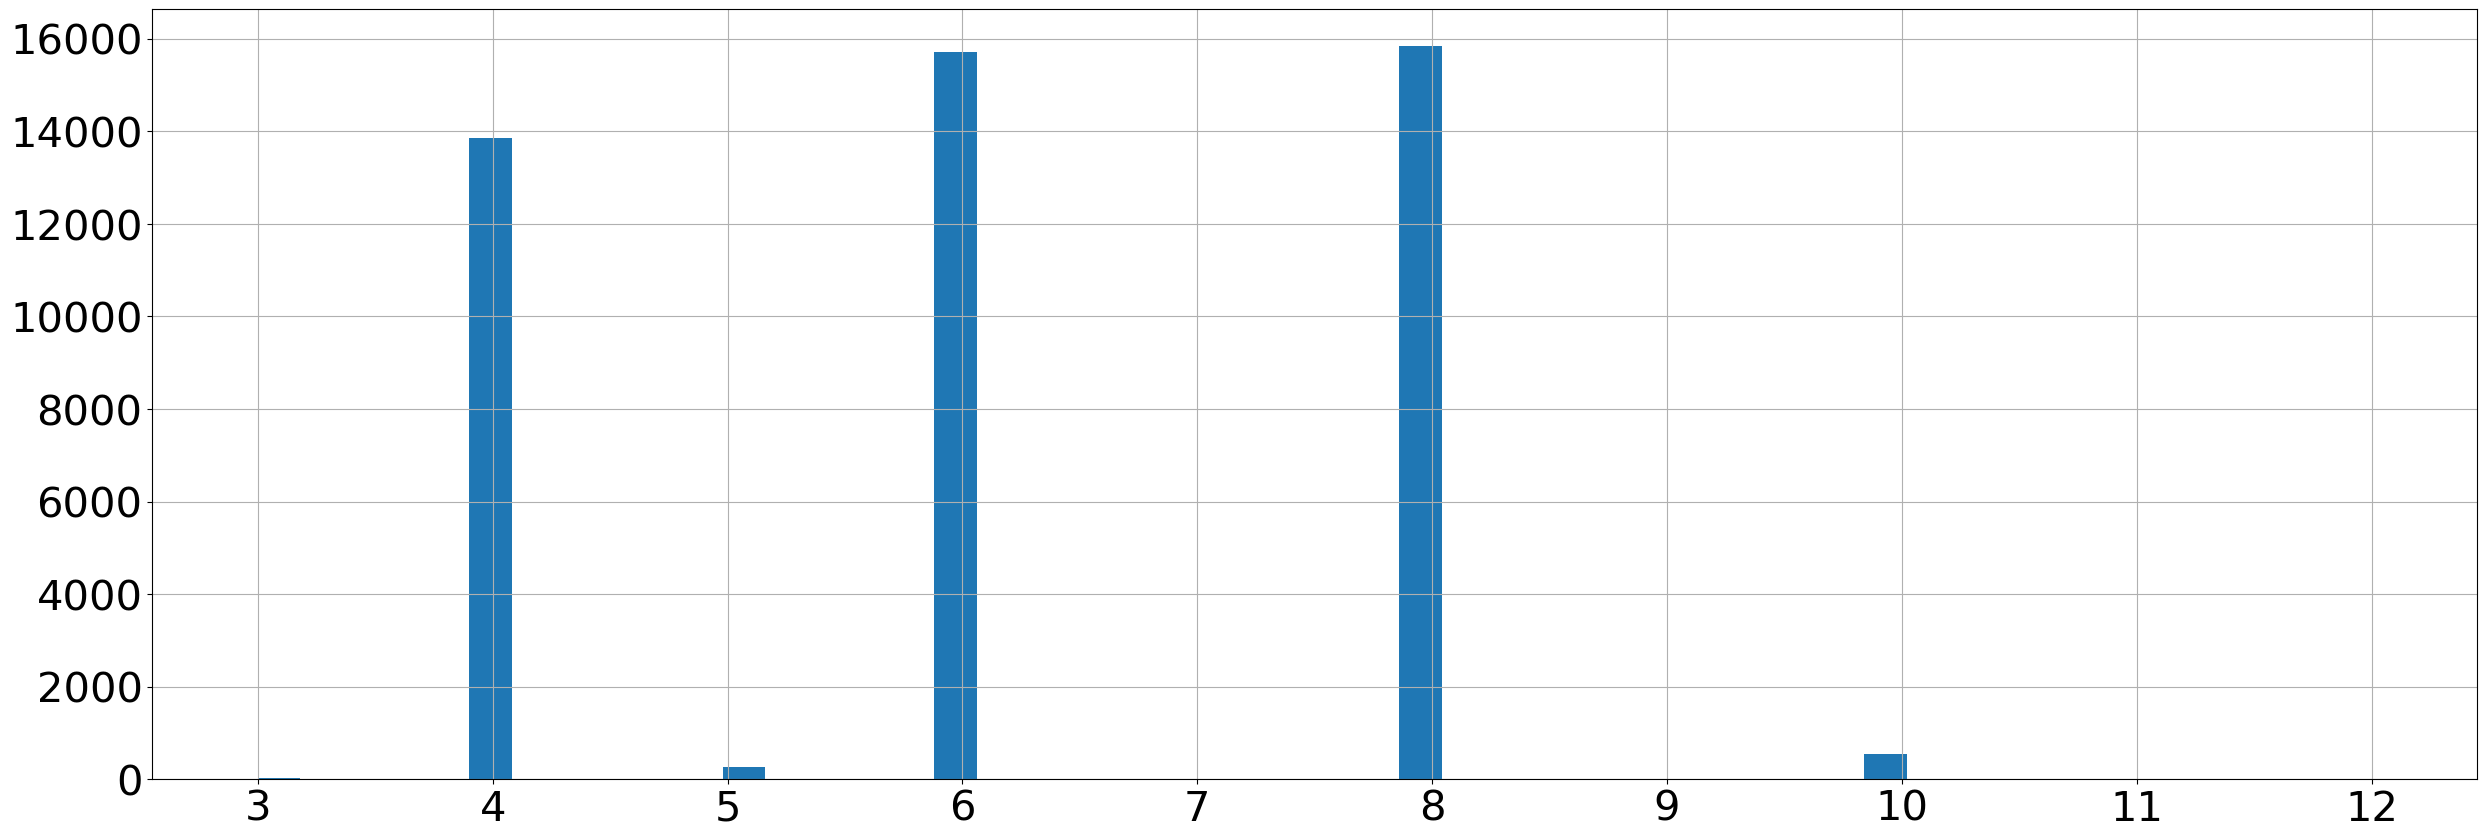

In [44]:
# Dado que no lo hicimos, veamos como se distribuyen los valores de 'cylinders'
df.loc[~df.cylinders.isna(),'cylinders'].hist(bins=50,figsize=(30,10))
plt.xticks(ticks=range(3,13),fontsize= 30)
plt.yticks(fontsize= 30)
plt.show()

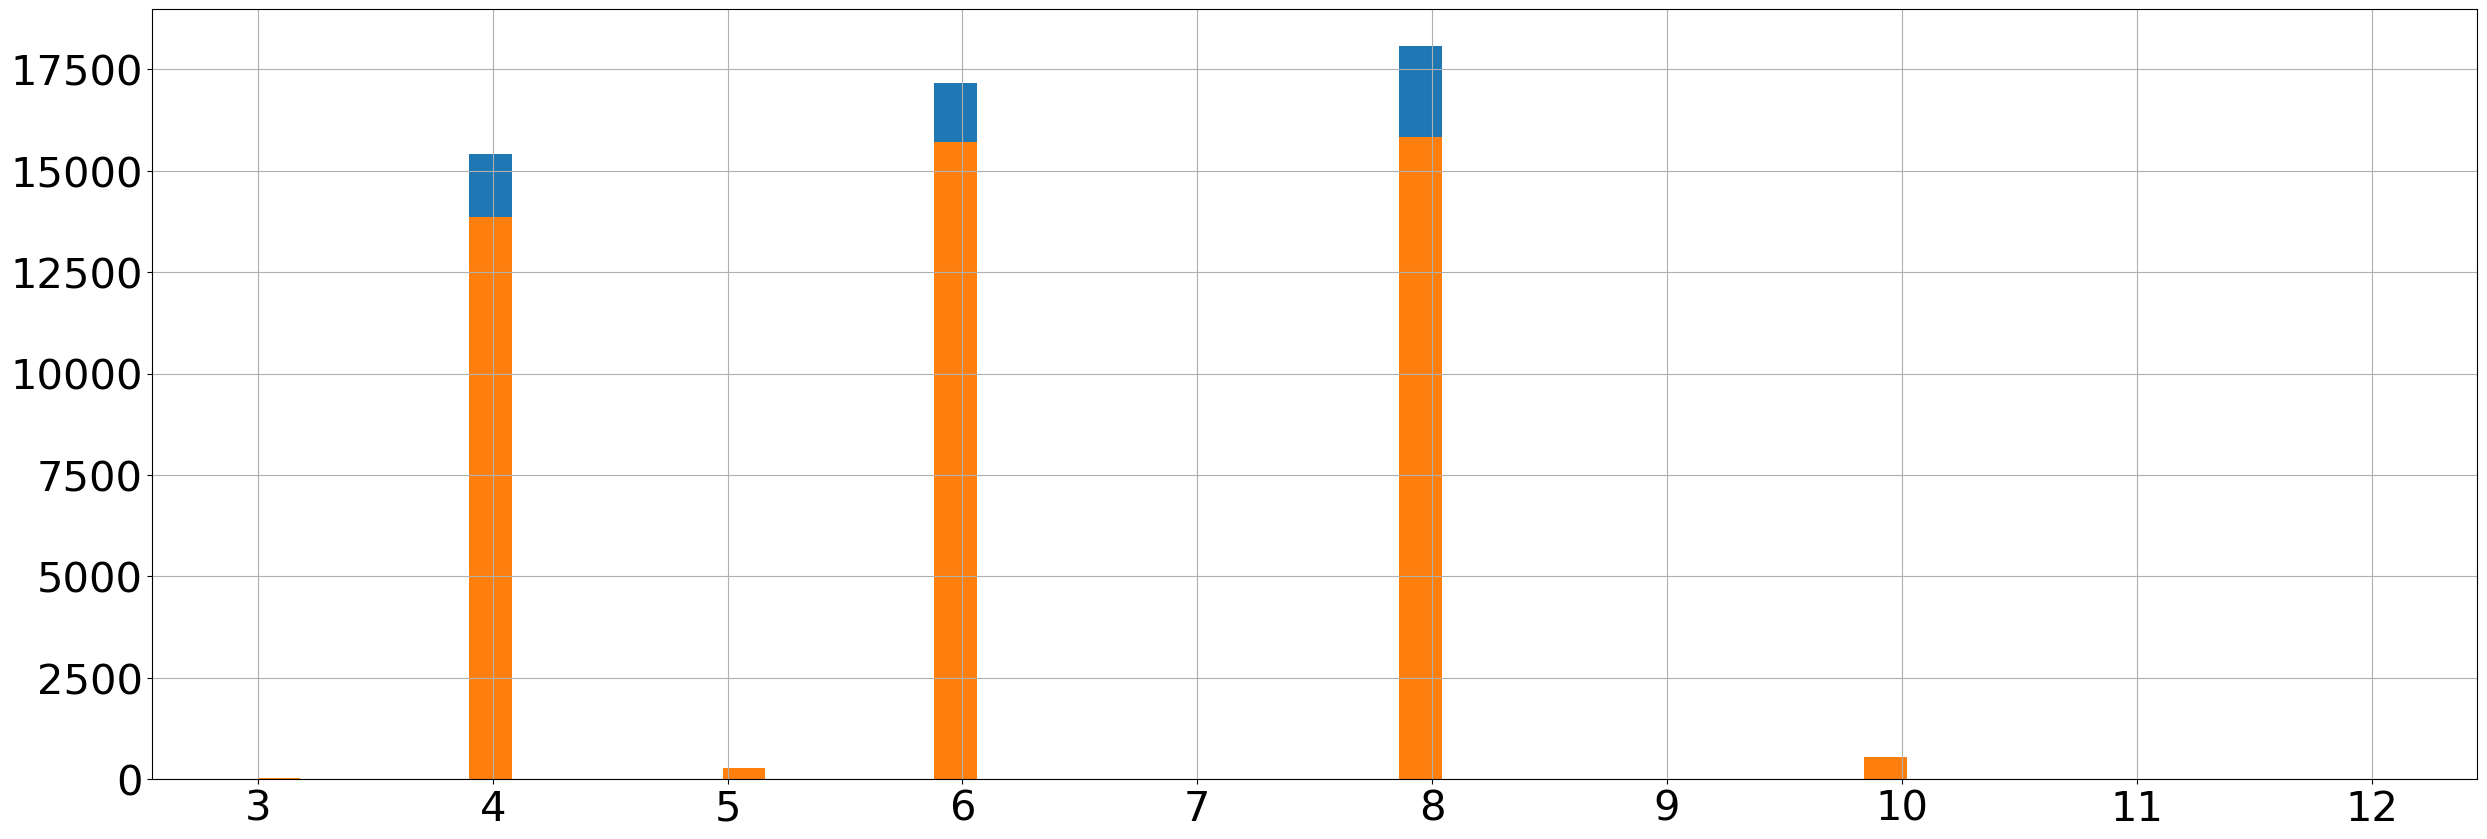

In [45]:
# Con la funcion hecha vamos a comparar si la tabla se modifica mucho
df.apply(replace_cylinders,axis=1).hist(bins=50,figsize=(30,10))
df.loc[~df.cylinders.isna(),'cylinders'].hist(bins=50,figsize=(30,10))
plt.xticks(ticks=range(3,13),fontsize= 30)
plt.yticks(fontsize= 30)
plt.show()

Similar a lo que vimos en `model_year`, sumamos una cantidad notable de valores a las categorias más normales. Entre todas las opciones que podemos tomar creo que es la más viable pues no alteramos el curso del df ni cambiamos drásticamente las conclusiones a las que vayamos a llegar posteriormente, simplemente reforzamos patrones que ya se daban y le damos un aumento a las conclusiones que ya se daban sin reemplazar.

In [46]:
# Conformes con el resultado lo aplicamos al dataset
df.loc[:,['cylinders']] = df.apply(replace_cylinders,axis=1)

## <a id='toc2_5_'></a>[Valores ausentes en `paint_color`](#toc0_)

Por último, podríamos afrontar el trabajo de los valores ausentes en `paint_color` pero realmente siendo algo que está tan poco definido en un auto ya que por ejemplo una consecionaria te ofrece como mínimo 3 colores diferentes aparte de que alguien puede simplemente pintar de un color que no sea común dentro de un mismo vehiculo.
  
Entonces, que hacemos? Lo mismo que hacemos todas las noches Pinky, intentar conquistar el mund- no... simplemente vamos a reemplazar los NaN en la columna por unos string que digan N/A para posteriormente corregir los *dtypes* de las columnas.

In [47]:
# Hacer eso es bastante simple
df['paint_color'].fillna('N/A',inplace= True)

In [48]:
# Verificamos
df['paint_color'].isna().sum()

0

Es un poco redundante eso ya que la funcion fillna() es bastante simple y confiable pero nunca está de más por si acaso.
  
Ahora le demos una ojeada a nuestro dataset de vuelta para ver como quedó!

In [49]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51516 entries, 0 to 51515
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51516 non-null  int64         
 1   model_year    51516 non-null  float64       
 2   model         51516 non-null  object        
 3   condition     51516 non-null  object        
 4   cylinders     51516 non-null  float64       
 5   fuel          51516 non-null  object        
 6   odometer      51516 non-null  float64       
 7   transmission  51516 non-null  object        
 8   catg          51516 non-null  object        
 9   paint_color   51516 non-null  object        
 10  is_4wd        51516 non-null  float64       
 11  date_posted   51516 non-null  datetime64[ns]
 12  days_listed   51516 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,catg,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,N/A,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,N/A,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51511,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51512,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51513,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51514,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


# <a id='toc3_'></a>[Corregir los tipos de datos](#toc0_)

Ya con la tabla más limpia vamos a proceder a corregir los tipos de datos en las columnas exceptuando `date_posted` que ya modificamos previamente.

In [50]:
df.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
catg                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [51]:
# Y finalmente cambiamos el dtype de la columna
df = df.astype({'model_year':'int64',
                'cylinders':'int64',
                'odometer':'int64',
                'is_4wd':'boolean'
               })

In [52]:
# Verificamos
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
catg                    object
paint_color             object
is_4wd                 boolean
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Perfecto, ahora vamos a seguir a partes más... cruciales del proyecto!

# <a id='toc4_'></a>[Enriquecer datos](#toc0_)

Ahora vamos a dedicarnos a agregar columnas para proporcionarnos información más detallada o específica respecto a los autos.
  
Primero vamos a ver si podemos agregar más detalles respecto a cuando fue publicado la venta del vehículo.

In [53]:
# Veamos si podemos agregar valores de la hora para cuando se colocó el anuncio
df['date_posted'].dt.hour


0        0
1        0
2        0
3        0
4        0
        ..
51511    0
51512    0
51513    0
51514    0
51515    0
Name: date_posted, Length: 51516, dtype: int64

In [54]:
# Hmmm, se ve raro eso. Tenemos algún valor que no sea 0?
df['date_posted'].dt.hour.sum()

0

Notamos como las filas no tienen horas disponibles y a menos que hayan horas negativas, todos los valores de dt.hour de la tabla son 0. Por lo tanto, podemos tranquilamente darnos el lujo de no agregar ninguna fila al respecto y seguir con nuestro proyecto.

In [55]:
# Vamos a agregar una columna en la que nos diga cuántos años tenía el vehiculo cuando colocaron el anuncio
df['age_when_posted'] = df['date_posted'].dt.year - df['model_year'] +1
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,catg,paint_color,is_4wd,date_posted,days_listed,age_when_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,N/A,True,2018-06-23,19,8
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,N/A,False,2019-03-22,9,17
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51511,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6
51512,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17
51513,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10
51514,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6


Ahora vamos a agregar una columna en la que nos diga el promedio de cuátas millas por año recorrió cierto vehículo para poder tener una idea clara de cuánto uso se le dió a un vehículo de manera más clara.

In [56]:
# Vamos a aprovechar la vectorización de las tablas para hacer eso de manera facil y eficiente
df['miles/year'] = round(df['odometer']/df['age_when_posted'],2)


Colocamos en el divisor un +1 para no dividir por 0 en los vehiculos modelo 2019. Eso se debe no solo para evitar tener valores NaN en la columna sino tambien para tomar en cuenta que en la industria automobilística es un estándar que el modelo 2019 de cierto auto sea vendido en el 2018,
  
Posteriormente vamos a modificar la columna `condition` para que en vez de tener cadenas de texto tengamos valores numéricos que no solo ocupan menos sino que también simplifican el trabajo con las mismas tanto en facilidad de texto sino tambien en facilidad de computación.

In [57]:
# Revisamos como quedó
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,catg,paint_color,is_4wd,date_posted,days_listed,age_when_posted,miles/year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,N/A,True,2018-06-23,19,8,18125.00
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.12
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714.29
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,N/A,False,2019-03-22,9,17,7172.24
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51511,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6,14689.33
51512,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17,10676.47
51513,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10,12800.00
51514,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6,23262.17


In [58]:
# Vemos de vuelta que valores teniamos en la tabla 'condition'
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [59]:
# Primero hacemos un diccionario que nos ayude a cambiar los valores
cond_dict = {
    'new':'5',
    'like new':'4',
    'excellent':'3',
    'good':'2',
    'fair':'1',
    'salvage':'0'
}

In [60]:
# Ahora vamos a reemplazar esas cadenas por nuestros hermosos números
df.loc[:,['condition']] = df.loc[:,['condition']].replace(cond_dict)

In [61]:
# Revisamos
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,catg,paint_color,is_4wd,date_posted,days_listed,age_when_posted,miles/year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,N/A,True,2018-06-23,19,8,18125.00
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.12
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714.29
3,1500,2003,ford f-150,1,8,gas,121928,automatic,pickup,N/A,False,2019-03-22,9,17,7172.24
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51511,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6,14689.33
51512,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17,10676.47
51513,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10,12800.00
51514,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6,23262.17


In [62]:
# Finalmente cambiamos el tipo dtype para corresponder con los cambios
df = df.astype({'condition':'int64'})

# <a id='toc5_'></a>[Comprobar datos limpios](#toc0_)

Ahora vamos a realizar una pequeña revisión de como nos quedaron los datos después del trabajo que les hicimos.

In [63]:
# imprime la información general/resumida sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51516 entries, 0 to 51515
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51516 non-null  int64         
 1   model_year       51516 non-null  int64         
 2   model            51516 non-null  object        
 3   condition        51516 non-null  int64         
 4   cylinders        51516 non-null  int64         
 5   fuel             51516 non-null  object        
 6   odometer         51516 non-null  int64         
 7   transmission     51516 non-null  object        
 8   catg             51516 non-null  object        
 9   paint_color      51516 non-null  object        
 10  is_4wd           51516 non-null  boolean       
 11  date_posted      51516 non-null  datetime64[ns]
 12  days_listed      51516 non-null  int64         
 13  age_when_posted  51516 non-null  int64         
 14  miles/year       51516 non-null  float

In [64]:
# imprimir una muestra de datos
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,catg,paint_color,is_4wd,date_posted,days_listed,age_when_posted,miles/year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,N/A,True,2018-06-23,19,8,18125.00
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.12
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714.29
3,1500,2003,ford f-150,1,8,gas,121928,automatic,pickup,N/A,False,2019-03-22,9,17,7172.24
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967.67
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,5,11590.80
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,19803.00
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,7,15639.00
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,N/A,True,2018-07-16,19,7,14882.00
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,12,12265.92


# <a id='toc6_'></a>[Estudiar parámetros principales](#toc0_)
  
Ahora vamos a definir cuales serían nuestros parámetros principales sobre los que vamos a realizar análisis más exhaustivos. Para poder lograr eso vamos a buscar que dichos parámetros sean numéricos ya que a diferencia de los datos categóricos podemos aprovechar sus características para visualizar, tratar y filtrarlos con mayor efectividad.
  
Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado
  
Nuestro objetivo en ésta etapa es eliminar los valores altamente atípicos para lograr conclusiones más apropiadas a los casos generales dentro.

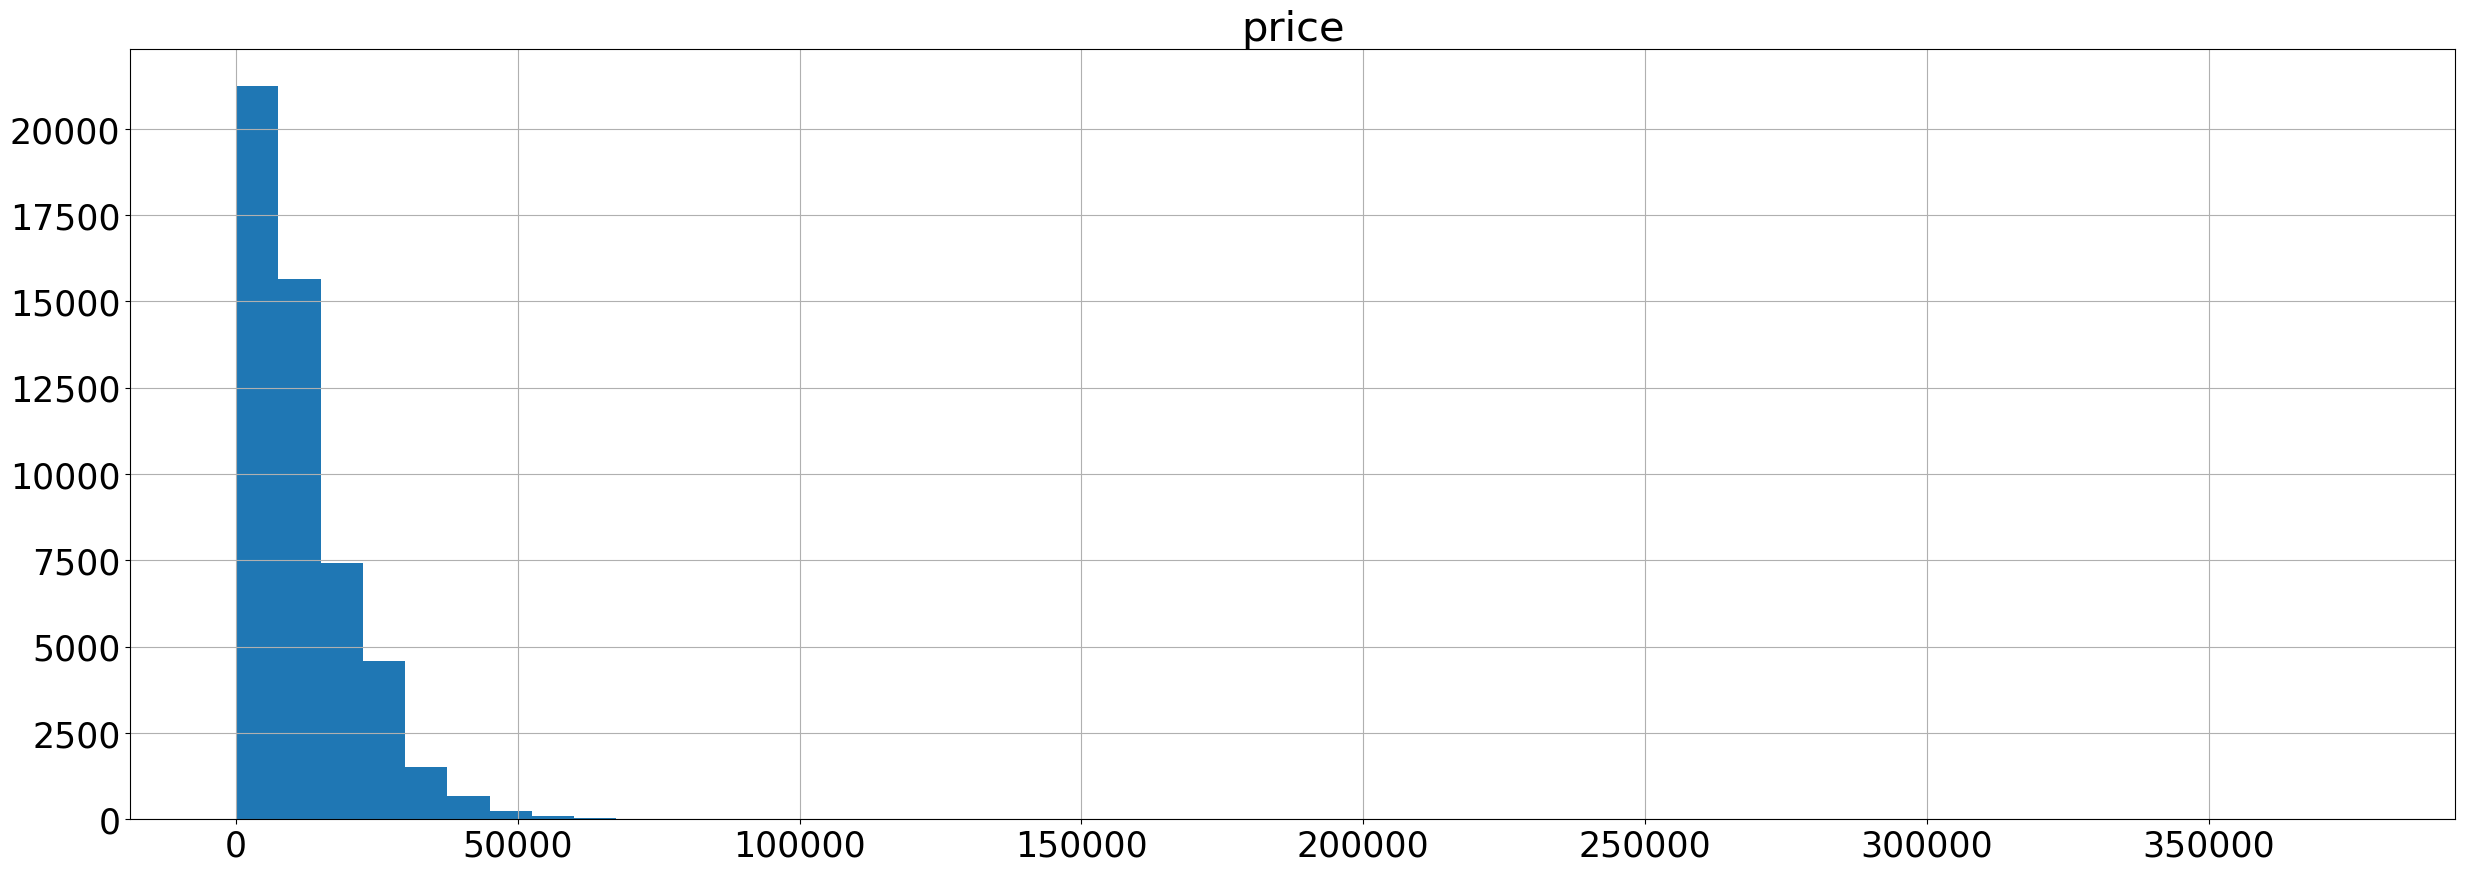

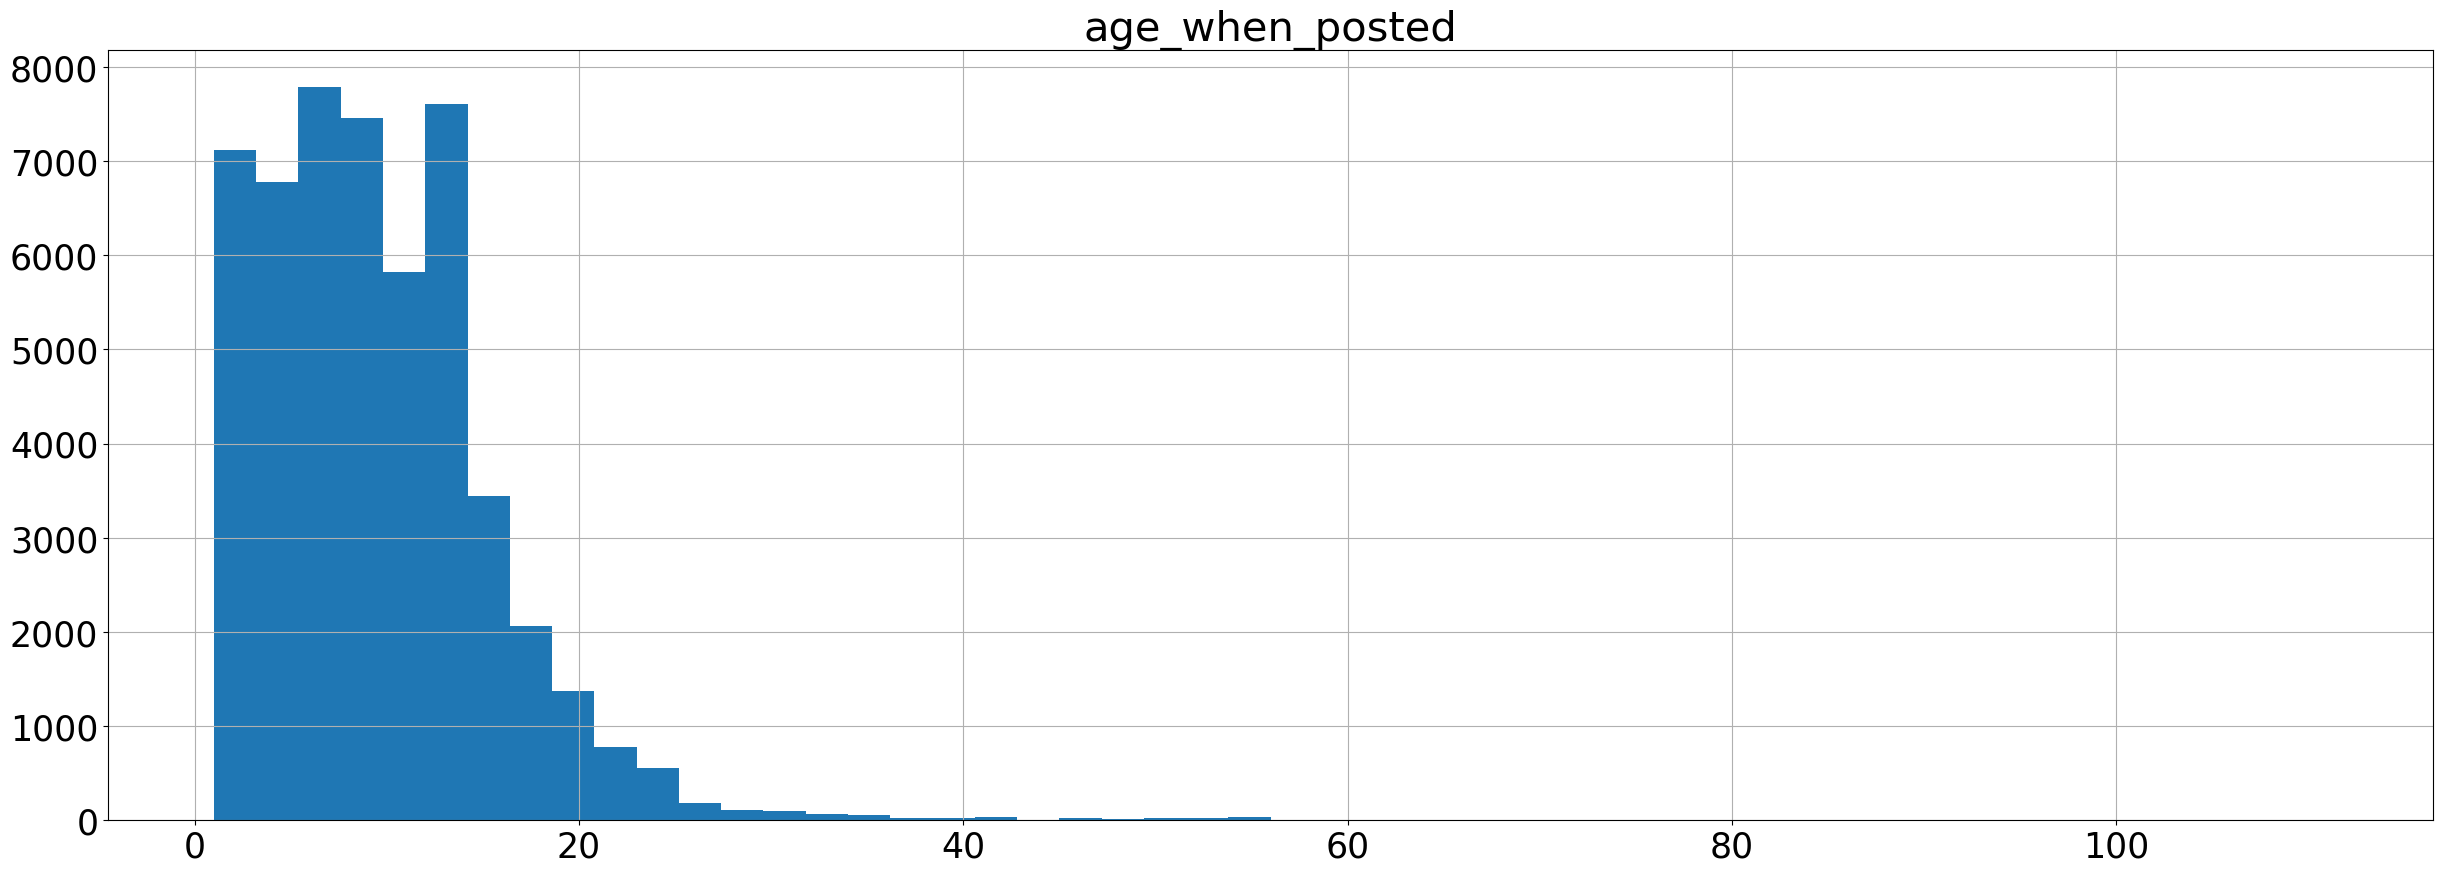

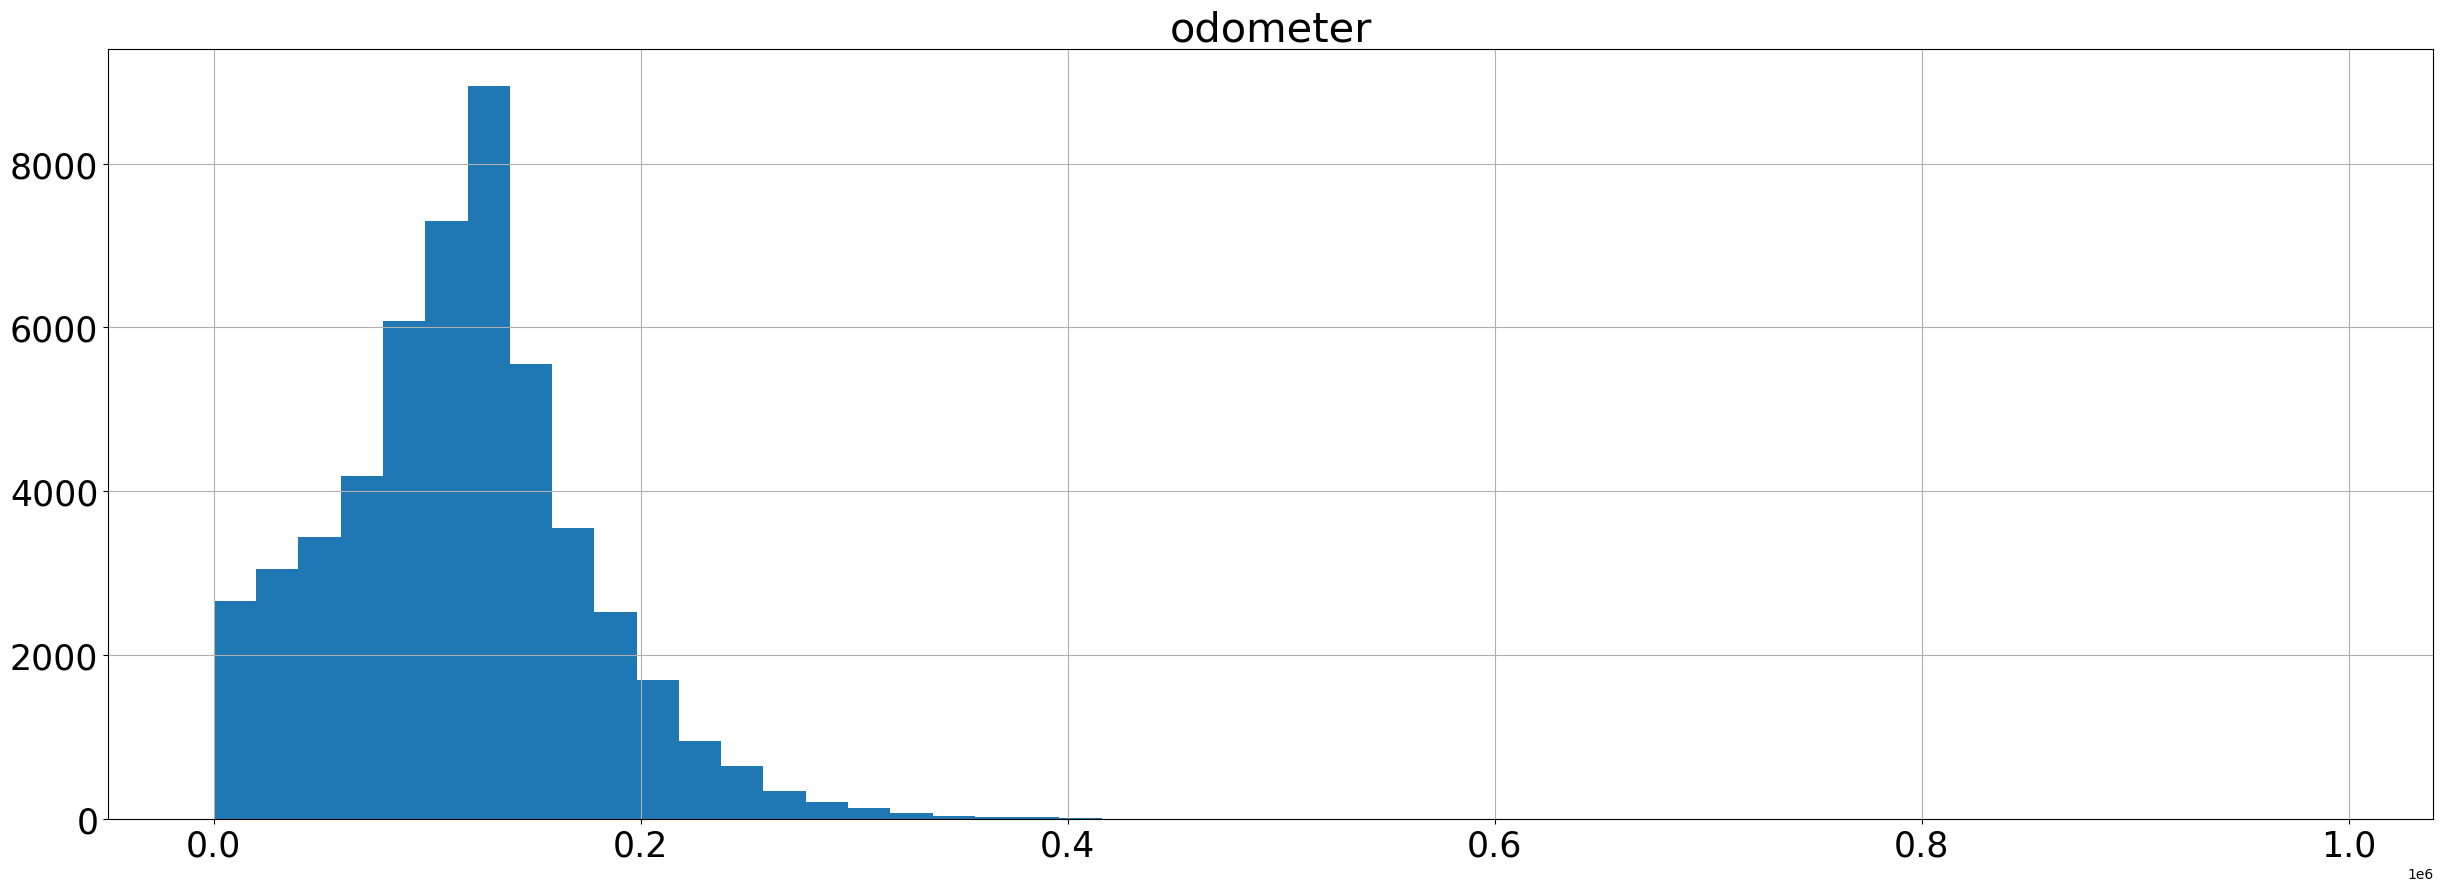

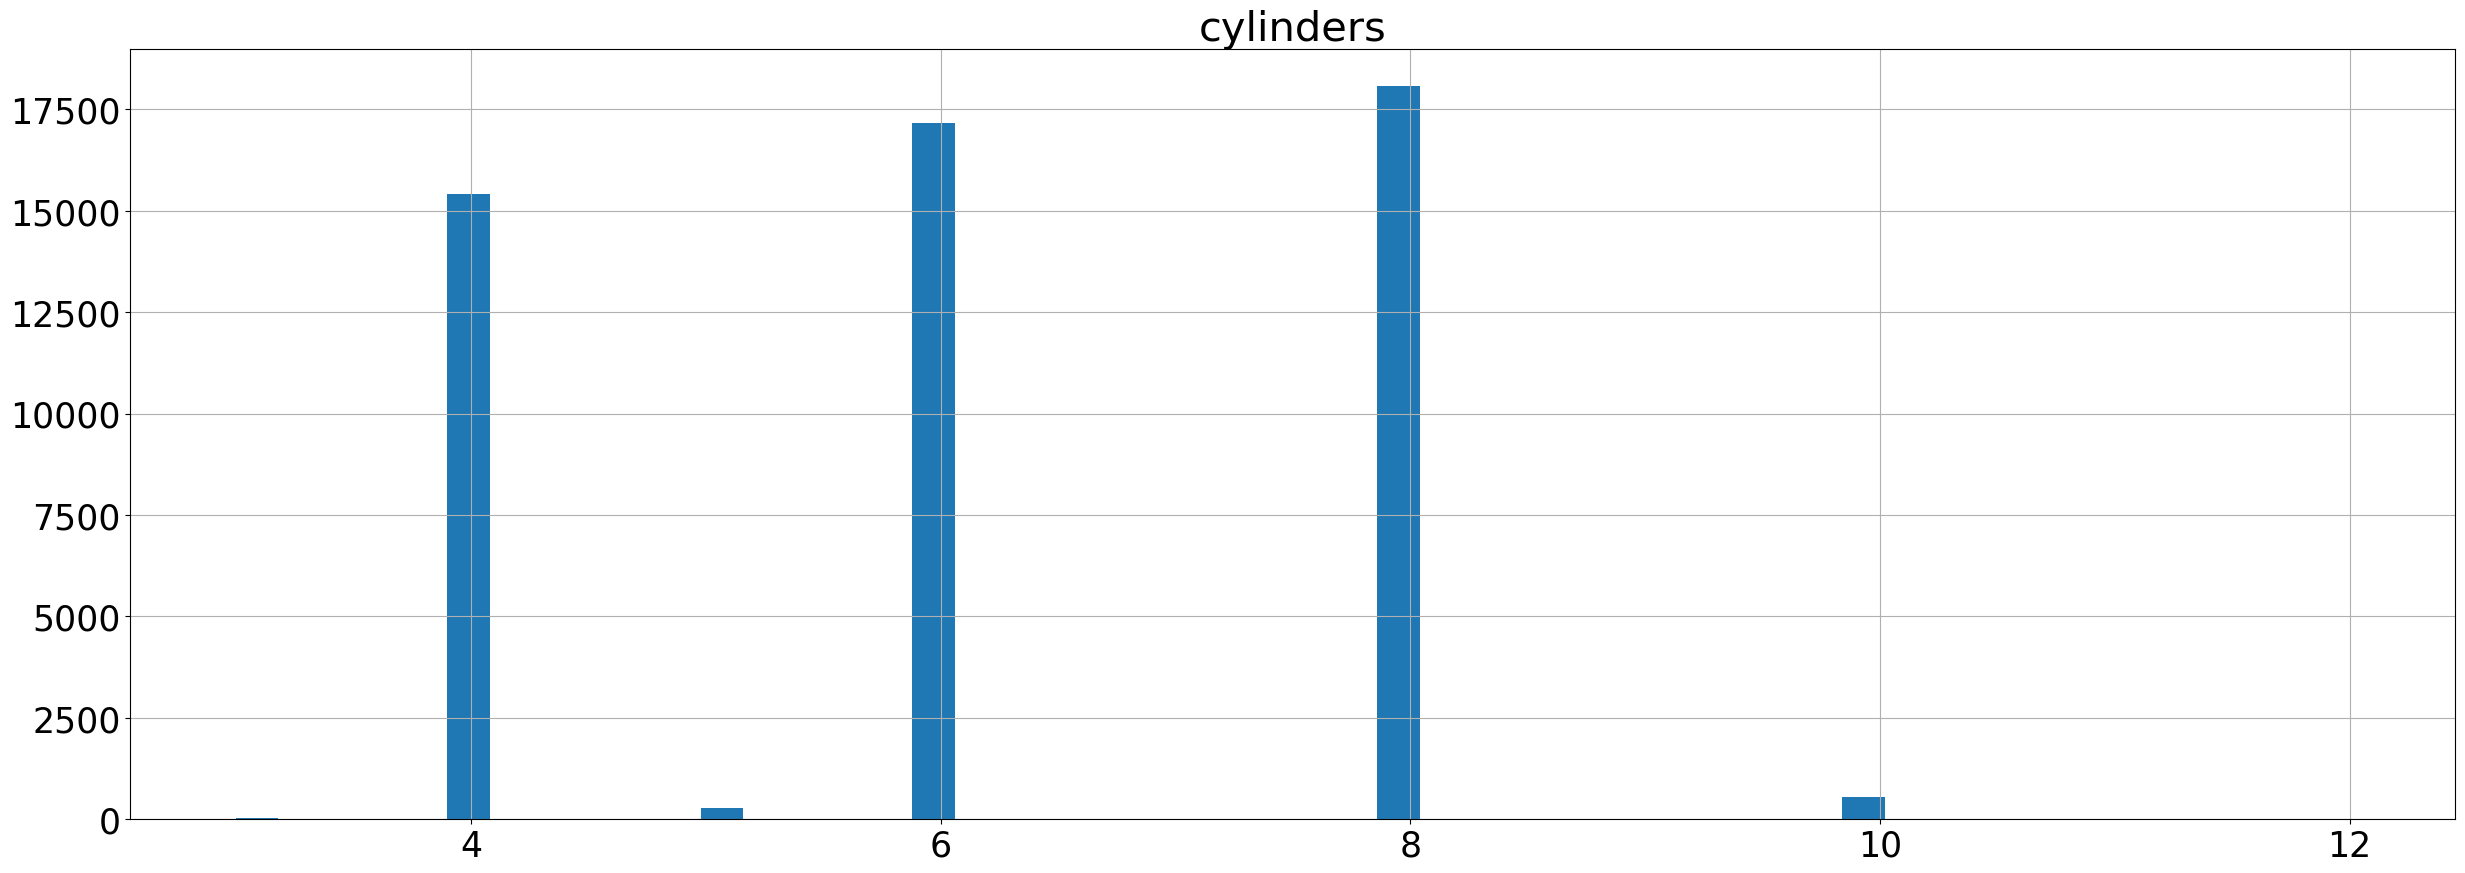

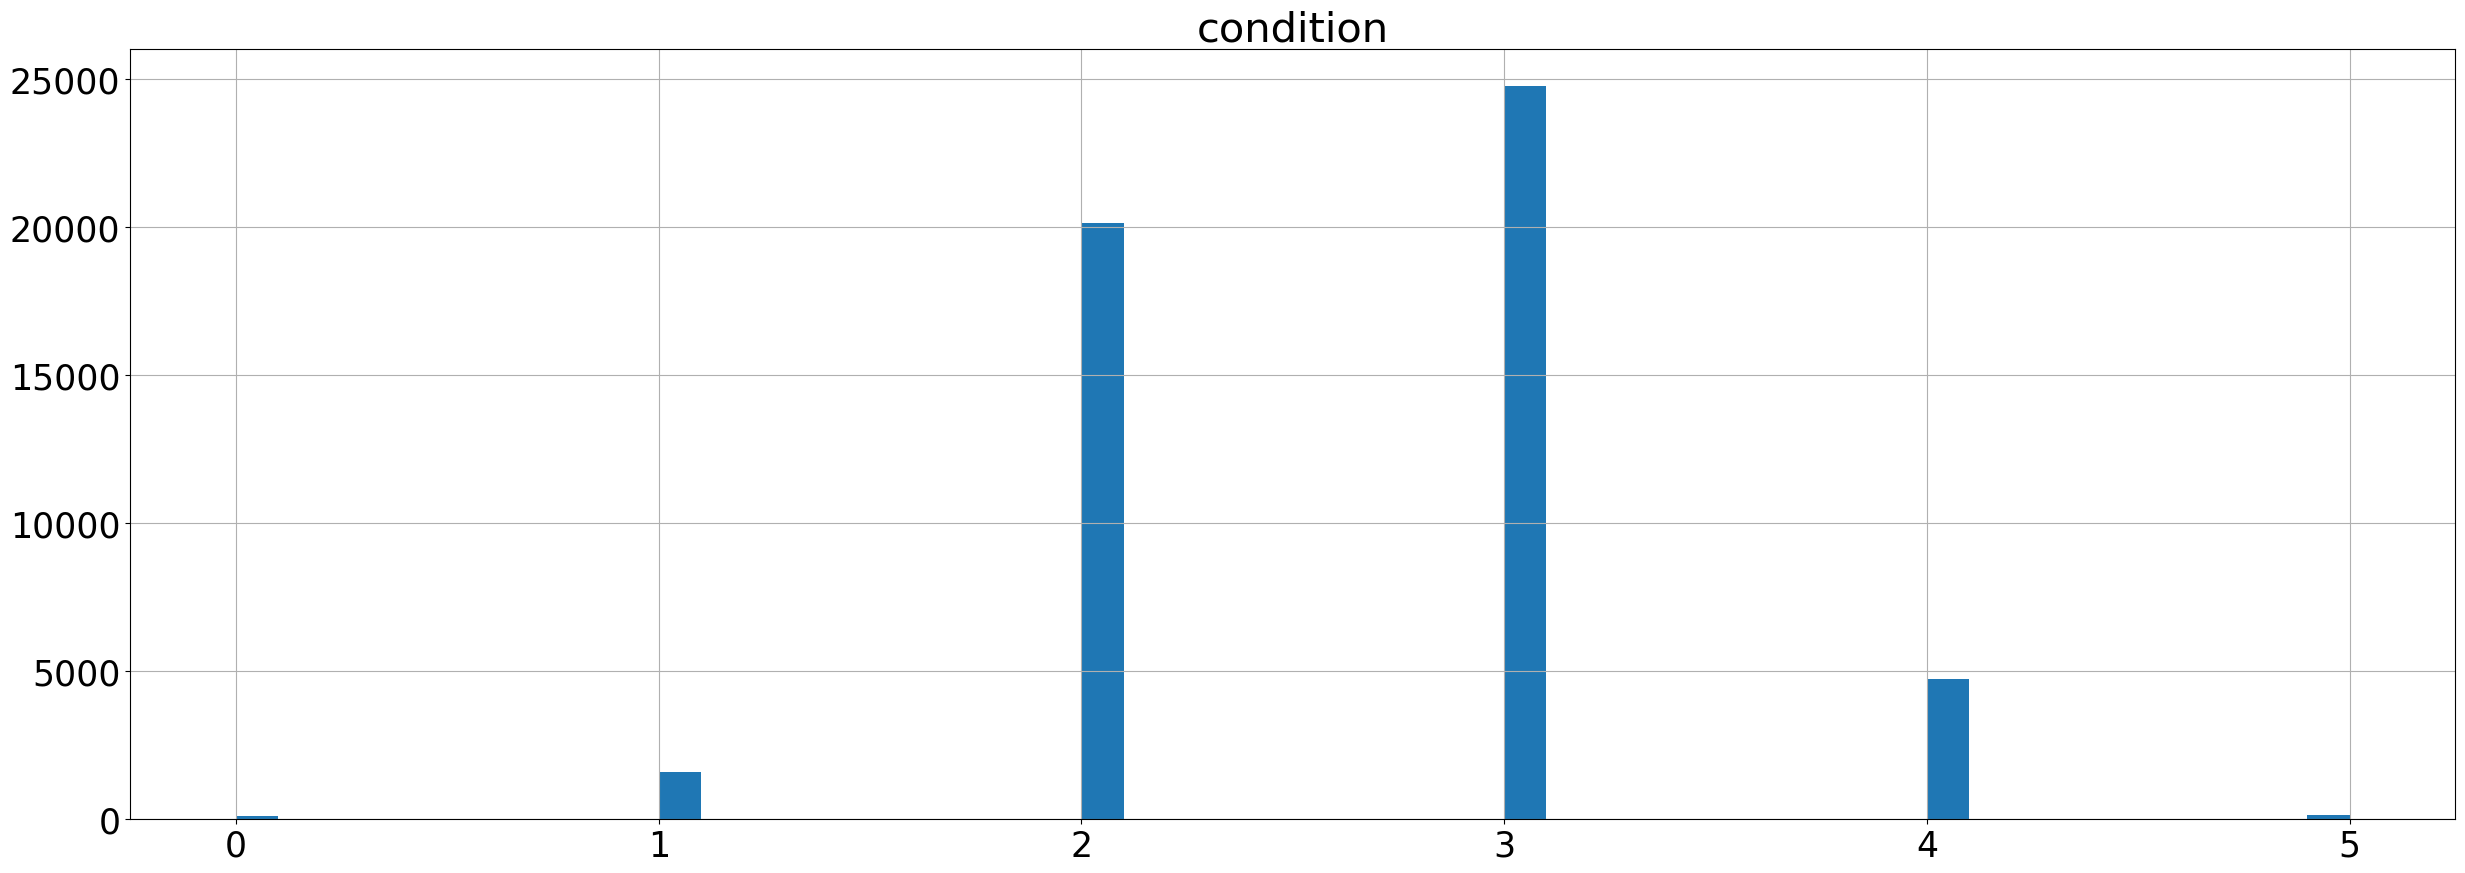

In [65]:
# Con la ayuda de una funcion for vamos a observar como se distribuyen los parametros
for param in ['price','age_when_posted','odometer','cylinders','condition']:
    df.hist(param,bins= 50,figsize=(30,10),xlabelsize=25,ylabelsize=25)
    plt.title(param,size= 30)

Al ver todos y cada uno de los gráficos podemos observar como todos tienen presencia de valores atípicos, y en el caso de las variables más "numericas" nos llama la atención hasta que punto llegan a alejarse dichos valores atípicos. Eso se puede ver claramente por como se estira el eje x.
  
Ahora vamos a ver numeros más estrictos con la ayuda de describe:

In [66]:
# Primero invocamos un describe para los parametros llamados
df.loc[:,['price','age_when_posted','odometer','cylinders','condition']].describe()


,price,age_when_posted,odometer,cylinders,condition
count,51516.000000,51516.000000,51516.000000,51516.000000,51516.000000
mean,12132.226570,9.514151,115344.234044,6.139491,2.637491
std,10040.783857,6.113410,60619.633370,1.662973,0.712435
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,5.000000,77086.750000,4.000000,2.000000
50%,9000.000000,9.000000,115532.000000,6.000000,3.000000
75%,16836.000000,13.000000,148177.000000,8.000000,3.000000
max,375000.000000,111.000000,990000.000000,12.000000,5.000000


In [67]:
# Ahora vamos a observar que tan distribuidas se encuentran los datos respectivamente ¿
for param in ['price','age_when_posted','odometer','cylinders','condition']:
    print(param,':',round((100*df[param].std()/df[param].mean()),5))

price : 82.76126
age_when_posted : 64.25598
odometer : 52.55541
cylinders : 27.08649
condition : 27.01185


Con ese bloque buscamos proporcionar los coeficientes de variacion porcentuales y así poder ver de manera más rigurosa cuál de nuestros parametros es el más diperso.
  
Era muy predecible que los parametros `cylinders` y `condition` iban a poseer menores CV% dado que tienen limitado que tan lejos puede irse un valor de lo normal. Por aparte, de pura casualidad vemos como se acomodaron en orden descendiente todos los CV% con el 1er puesto ocupado por price.
  
Lo que podemos sacar de ésto es que las columnas `price` y `age_when_posted` presentaran la mayor complicación a la hora de limpiarlos de datos atipicos ya que los rangos finales seran los mas amplios.

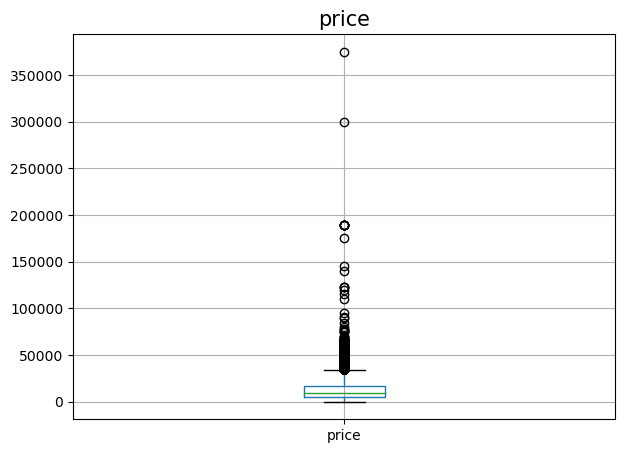

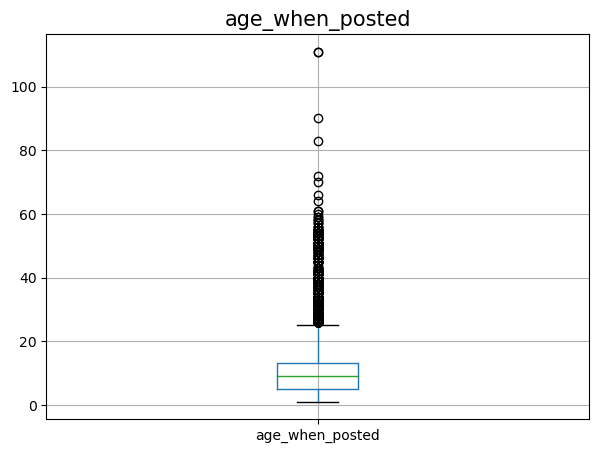

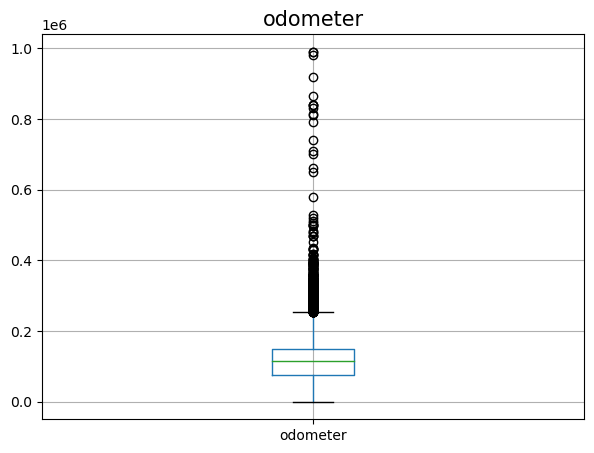

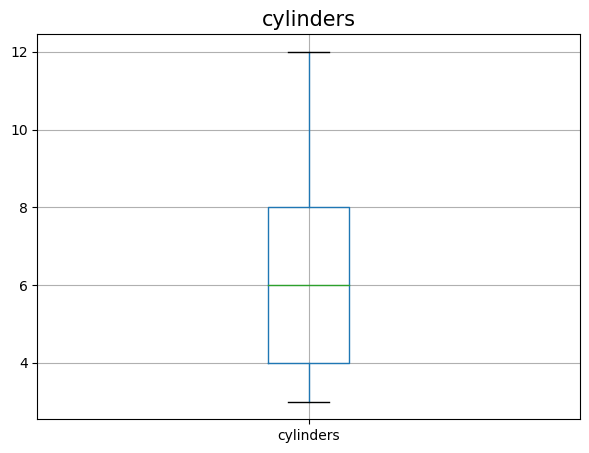

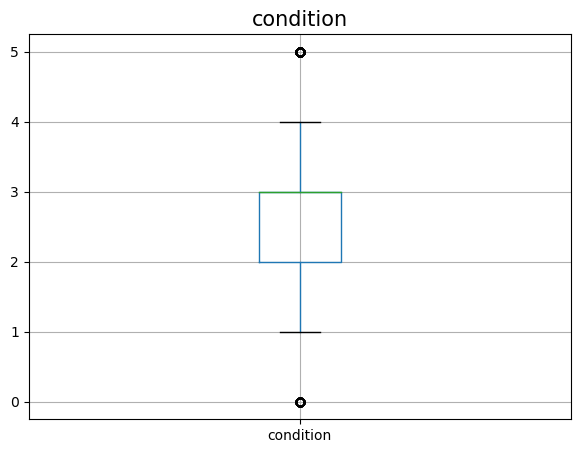

In [68]:
# Ahora vamos a observar una forma mas clara si son muchos los valores atipicos
for param in ['price','age_when_posted','odometer','cylinders','condition']:
    df.boxplot(param,figsize=(7,5))
    plt.title(param,size= 15)
    plt.show()

Los graficos de bigotes solo dejan mas en evidencia lo que los histogramas y los CV% nos habian mostrado. Con la situacion de los parametros evidente, ahora solo nos queda avanzar a la siguiente etapa y tratar esos valores atipicos.

## <a id='toc6_1_'></a>[Estudiar y tratar valores atípicos](#toc0_)

Ya con analisis superficial de los parametros vamos a pasar a hacer in analisis concreto centrado en los valores atipicos, o mejor dicho donde comienzan los mismos.
Para ello vamos a definir los limites superiores e inferiores que engloban los valores tipicos de los parametros. Obtener esos valores no es nada complicado ni requiere de matematica avanzada, solo de una pequeña formula:
  
$IQR = Q3 - Q1$
  
 *Limite  inferior:* $Q1 - 1.5*IQR$
  
 *Limite  superior:* $Q3 + 1.5*IQR$
  
$ IQR:$ *Rango intercuartil*
  
$ Q1:$ *Primer cuartil*
  
$ Q3:$ *Tercer cuartil*

In [69]:
# Los limites inferiores son facilmente obtenibles de los graficos
li_price = 0
li_age = 0
li_odometer = 0 
li_condition = 1

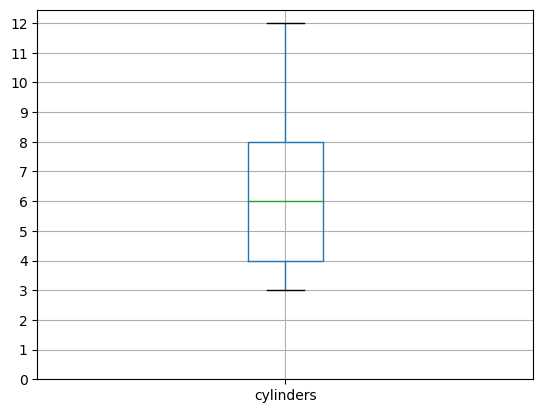

In [70]:
# Para el caso de cylinders vamos a obtener un mejor grafico
df.boxplot('cylinders')
plt.yticks(range(0,13))
plt.show()

In [71]:
# Efectivamente nos damos cuenta que el primer grafico no mostraba las cosas a proporcion
li_cylinders = 3

# Tambien podemos obtener el limite superior con esta grafica
ls_cylinders = 12

In [72]:
# Para determinar los limites superiores hagamos una pequeña funcion
def get_ls(df,column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    return (Q3 + 1.5*IQR)

In [73]:
# Ya que estamos, hacemos una funcion para obtener el limite inferior tambien 
def get_li(df,column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    return (Q1 - 1.5*IQR)

In [74]:
# Vamos a determinar los limites superiores con nuestra funcion
ls_price = get_ls(df,'price')
ls_age = get_ls(df,'age_when_posted')
ls_odometer = get_ls(df,'odometer')
ls_condition = get_ls(df,'condition')

In [75]:
# Ahora vamos a almacenar los datos sin valores atípicos en un DataFrame separado
# Para eso vamos a crear un filtro primero
filter = (
    (li_price <= df['price'])&(df['price'] <= ls_price)&
    (li_age <= df['age_when_posted'])&(df['age_when_posted'] <= ls_age)&
    (li_odometer <= df['odometer'])&(df['odometer'] <= ls_odometer)&
    (li_condition <= df['condition'])&(df['condition'] <= ls_condition)&
    (li_cylinders <= df['cylinders'])&(df['cylinders'] <= ls_cylinders)
)

In [76]:
# Ahora si vamos a crear una tabla sin valores atipicos
clean_df = df[filter]

## <a id='toc6_2_'></a>[Estudiar parámetros principales sin valores atípicos](#toc0_)

Ahora con la tabla sin valores atípicos podemos pasar al análisis de como afectó a nuestros parametros remover los valores atípicos. Para eso primero haremos un leve análisis y posteriormente llamaremos histogramas para ver como resultan los mismos lado a lado.
  
En nuestra comparación colocaremos los datos filtrados con naranja y 50 *bins* pero excluyendo eso dejaremos todos los valores a los default así lograremos ver con mejor detalle el impacto de nuestro trabajo en los datos.

In [77]:
# Primero veamos cuantas filas perdimos
print(
'df:',len(df),'\n',
'clean_df:',len(clean_df),'\n',
'Filas eliminadas:',len(df) - len(clean_df)
)

df: 51516 
 clean_df: 48040 
 Filas eliminadas: 3476


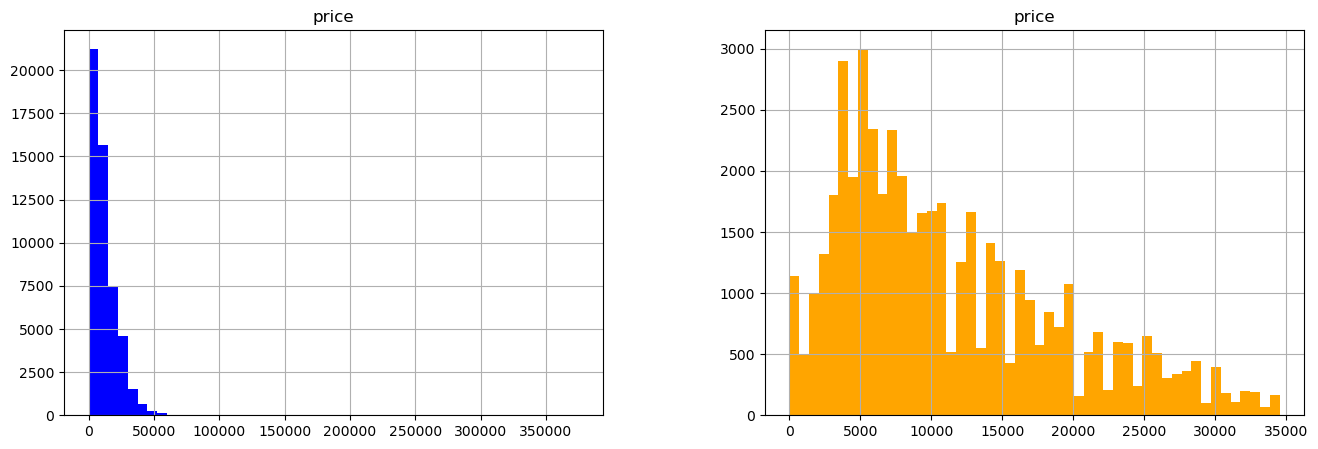

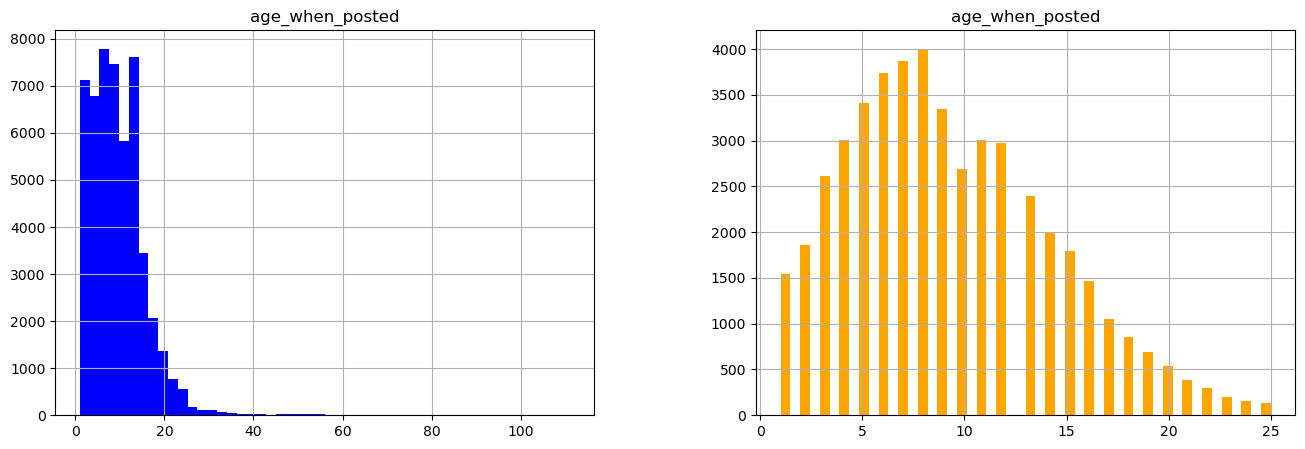

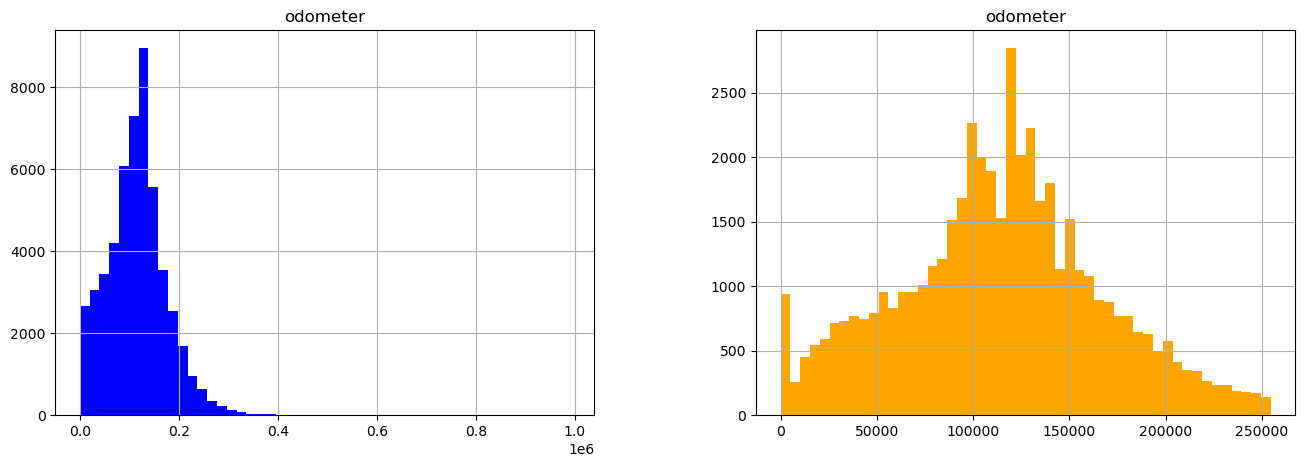

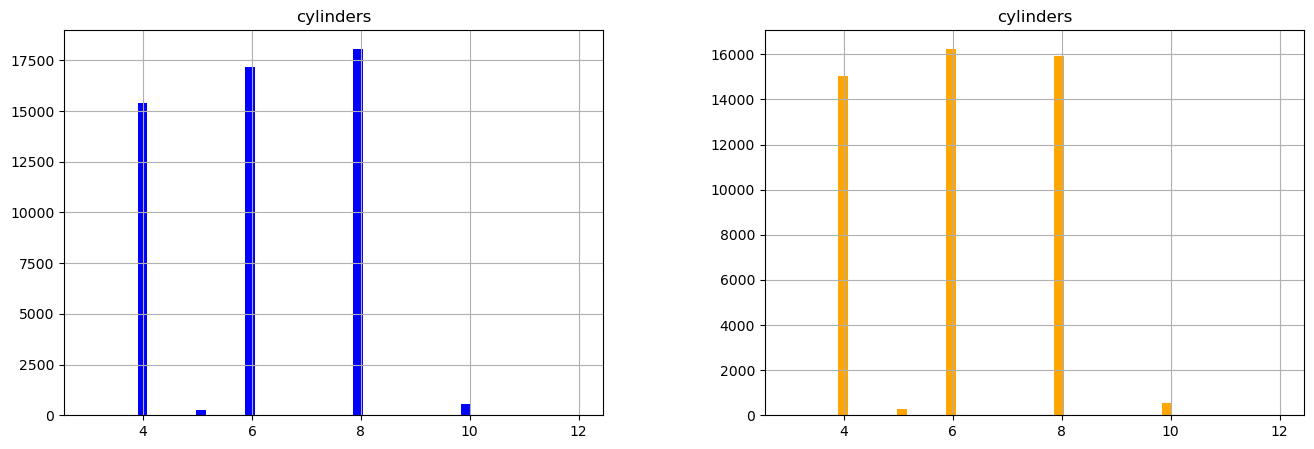

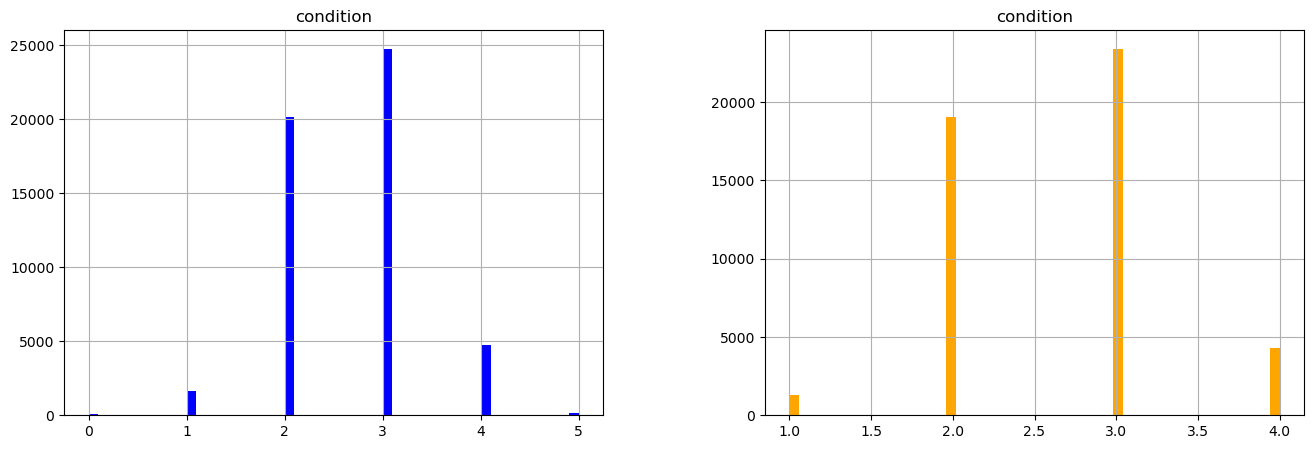

In [78]:
for param in ['price','age_when_posted','odometer','cylinders','condition']:
    fig, axes = plt.subplots(1,2,figsize=(16,5))
    df.hist(param,bins= 50,ax= axes[0],color='blue')
    clean_df.hist(param,bins= 50,ax= axes[1],color='orange')
    plt.show()

El impacto de eliminar los valores atípicos es más que evidente, excepto en el caso de `cylinders` y `condition`. Lo que antes era simplemente un pico extremadamente alto sin mucho que decir ahora se transformó en una montaña escalonada con la posibilidad de ver detalles mucho más chicos y contrastes claros entre los valores más comunes y valores que son comunes tambien pero no al mismo nivel.
  
Pero todo eso vino con el costo de eliminar 3476... o un 6,7% de la tabla original. A mi parecer, creo que es un intercambio completamente favorable ya que perdimos un poco más del 5% de las filas a cambio de la posibilidad de realizar estudios y análisis con una precisión mucho más precisa que representa mucho mejor al dataframe en general.

# <a id='toc7_'></a>[Periodo de colocación de los anuncios](#toc0_)
Ahora vamos a realizar trabajos sobre la columna `days_listed`, vamos a averiguar datos estadísticos como la media y la mediana. El objetivo de ésta etapa es discernir los datos atípicos altos y bajos, y marcar los límites de estos mismos datos.

In [79]:
# Vamos a dar un paneo general sobre la columna 'days_listed'
df['days_listed'].describe()

count    51516.000000
mean        39.554663
std         28.204317
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

En mi opinion yo siempre voy a ser un partidario del método *describe* ya que nos permite tener un paneo general y nos provee con diferentes valores clave como el promedio, la mediana y la desviación estándar.
  
En el caso de `days_listed` podemos observar como la media es mayor que la mediana y el CV% se ubica en un no modesto 71% indicando la presencia de valores atípicos altos que desvían el promedio hacia arriba.

In [80]:
# Vamos a llamar nuestra funcion para obtener los límites superiores e inferiores
print(
'Limite inferior:',get_li(df,'days_listed'),'\n'
'Limite superior:',get_ls(df,'days_listed')
)

Limite inferior: -32.0 
Limite superior: 104.0


Como era de esperar, el límite inferior efectivo es 0 pero lo que nos interesa es el límite superior. Con un valor de 104 notamos como el máximo se encuentra bastante lejos del límite superior.

Cantidad de valores atípicos: 1617


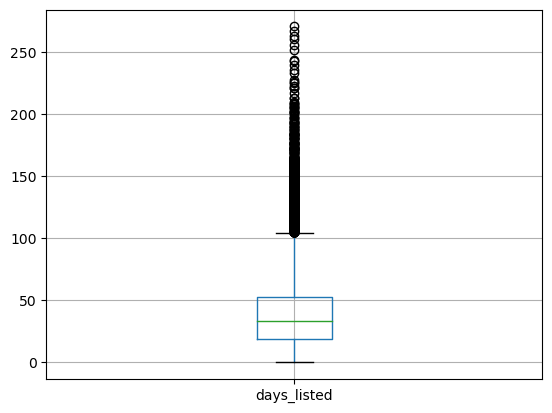

In [81]:
# Observemos un poco más detalladamente la columna
print('Cantidad de valores atípicos:',len(df[df['days_listed'] > 104]))
df.boxplot('days_listed')
plt.show()

Con ésto descubrimos que no son pocas las filas que estuvieron demasiado tiempo publicadas pero tampoco representan un número significativo respecto a todo el dataset. Por úlitmo me surgió la duda de cuántas de éstas filas se encuentran dentro de nuestro `clean_df`.

Cantidad de valores atípicos: 1503


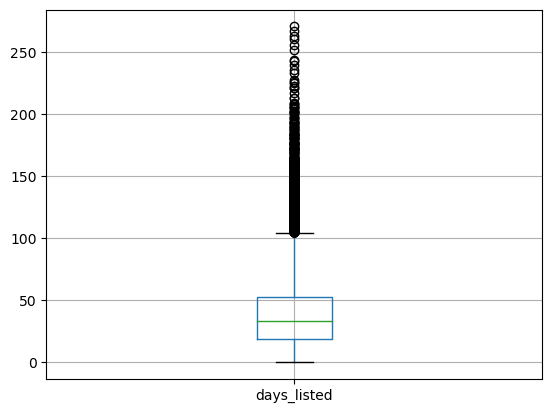

In [82]:
print('Cantidad de valores atípicos:',len(clean_df[clean_df['days_listed'] > 104]))
clean_df.boxplot('days_listed')
plt.show()

Al parecer no estan muy vinculados los valores atípicos de `days_employed` con el de los parametros, y con eso concluimos el análisis sobre los valores anormalmente altos.
  
Ahora, donde definimos el "límite inferior artificial"?
  
Esa es ciertamente una cuestión sobre la cual podemos tomar una decisión arbitraria, pero primero prefiero hacer una investigación leve para hacer una decisión arbitraria educada.

In [83]:
# Para eso vamos a efectuar nuestro querido amigo describe() por debajo de Q1
df[df['days_listed'] < df['days_listed'].quantile(0.25)]['days_listed'].describe()

count    12559.000000
mean        11.128752
std          4.681926
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         18.000000
Name: days_listed, dtype: float64

Con éste describe llegamos a la respuesta que tanto buscabamos:
- Límite inferior: `4`
  Vamos a decidirnos por el valor de 4 días ya que de esa forma vamos a descartar solo 1570 filas (similar a las descartadas por el límite superior) y categorizar en base a los 4 días me suena coherente.
   
- Límite superior: `104`
  El caso del límite superior es más basado en calculos más rigurosos y menos arbitrario que en la contraparte.
  
Basicamente, si un anuncio tiene 4 o menos días publicado vamos a categorizarlo como anuncio atípicamente bajo, y por su contraparte si un anuncio tiene más de 104 días publicado vamos a categorizarlo como anuncio atípicamente alto.

# <a id='toc8_'></a>[Precio promedio por cada tipo de vehículo](#toc0_)

Ahora vamos a analizar el precio promedio de cada tipo de vehiculo mientras vemos la cantidad de anuncios que tiene cada tipo. Posteriormente vamos a seleccionar los dos tipos con mayor cantidad de anuncios para realizar análisis sobre ellos.

                     mean  count
catg                            
SUV          11148.946048  12400
truck        16734.894924  12353
sedan         6965.912525  12152
pickup       16057.133104   6987
coupe        14353.442901   2303
wagon         9088.134328   1541
mini-van      8193.177433   1161
hatchback     6868.513849   1047
van          10508.408228    632
convertible  14575.881166    446
other        10989.714844    256
offroad      14292.294393    214
bus          17135.666667     24


C:\Users\Cruh\AppData\Local\Temp\ipykernel_12784\1109356474.py:2: FutureWarning: ['model', 'fuel', 'transmission', 'paint_color'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df.groupby('catg').agg(['mean','count'])['price'].sort_values('count',ascending= False))
C:\Users\Cruh\AppData\Local\Temp\ipykernel_12784\1109356474.py:3: FutureWarning: ['model', 'fuel', 'transmission', 'paint_color'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('catg').agg(['mean','count'])['price'].sort_values('count',ascending= False).plot(kind='bar')


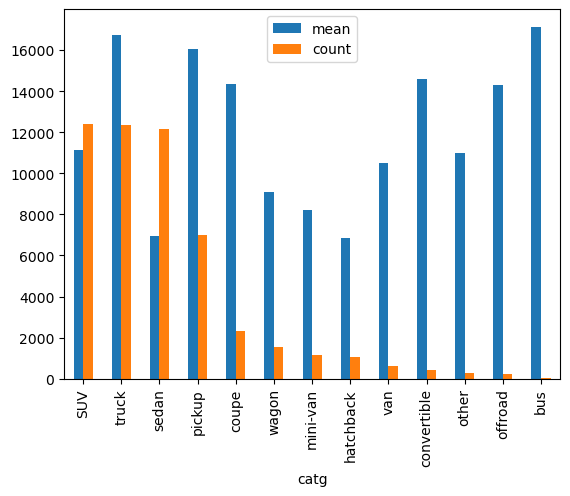

In [84]:
# De suerte lo que queremos hacer puede ser obtenido con muy poco código
print(df.groupby('catg').agg(['mean','count'])['price'].sort_values('count',ascending= False))
df.groupby('catg').agg(['mean','count'])['price'].sort_values('count',ascending= False).plot(kind='bar')
plt.show()

Okay, podemos ver dos cosas principales de éstos números y gráficos:
- Primero notamos como las categorias `SUV`, `truck` y `sedan` dominan los anuncios sacando una amplia diferencia al resto de las categorías.
- Tambien podemos ver como la categoría `bus` es la más cara y la que menos anuncios tiene.
  
Por aparte, si bien dijimos que ibamos a tomar las primeras 2 categorias supongo que vamos a cambiar nuestra decisión y tomar las primeras 3. Ésto se debe a que no esperaba que esas 3 se encuentren tan cerca con el número de publicaciones y me pareceria mal no tomar `sedan` siendo que solo tiene 200 filas menos.

In [85]:
# Para facilitar el trabajo despues, creamos una variable enfocada en esas categorias
popular_catg = clean_df[(clean_df['catg'] == 'SUV')|(clean_df['catg'] == 'sedan')|(clean_df['catg'] == 'truck')]

# <a id='toc9_'></a>[Factores de precio](#toc0_)

  Ahora con todos los análisis premilinares terminados, ya podemos pasar a tratar lo que vinimos a hacer: Ver que factores influencian más el precio de un vehículo.
  
Recapitulemos entonces:
- Los parametros que más veremos son `age_when_posted`, `odometer`, `cylinders` y `condition`
- Buscaremos analizar en base a nuestra tabla sin valores atípicos para obtener más detalles sobre lo que buscamos
- Solo tomaremos en cuenta publicaciones que tengan entre *4* y *104* días totales
- Centraremos el análisis sobre los 3 tipos de vehiculos más publicados: *SUV, truck y sedan*
  
Otra cosa que agregaremos a nuestro análisis es que al analizar las variables categóricas vamos a verificar que éstas tengan al menos 50 anuncios sino realizaríamos el análisis sobre partes muy chicas que nos pueden dar conclusiones incorrectas.

Antes de empezar a trabajar, veamos como quedó el conjunto de datos respecto al final!

In [86]:
popular_catg.info()
print('')
df0.info()
print('\n',len(df0)-len(popular_catg),
     '\n',100*(len(df0)-len(popular_catg))/len(df0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34785 entries, 0 to 51515
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            34785 non-null  int64         
 1   model_year       34785 non-null  int64         
 2   model            34785 non-null  object        
 3   condition        34785 non-null  int64         
 4   cylinders        34785 non-null  int64         
 5   fuel             34785 non-null  object        
 6   odometer         34785 non-null  int64         
 7   transmission     34785 non-null  object        
 8   catg             34785 non-null  object        
 9   paint_color      34785 non-null  object        
 10  is_4wd           34785 non-null  boolean       
 11  date_posted      34785 non-null  datetime64[ns]
 12  days_listed      34785 non-null  int64         
 13  age_when_posted  34785 non-null  int64         
 14  miles/year       34785 non-null  float

Cedimos 16740 publicaciones pero terminamos con un conjunto de datos uniforme, en perspectiva... perder un 32.5% no es tanto, no es poco tampoco. Pero tenemos la certeza de que vamos a trabajar disminuyendo al mínimo la presencia de datos atípicos con lo que una conclusión general es más precisa.
  
Ahora, sin más preambulo (creo que dije muchas veces eso) vamos a graficar!

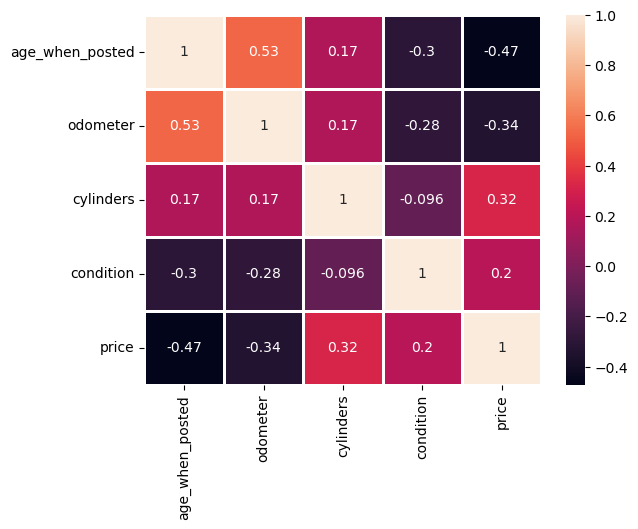

In [87]:
# Primero vamos a ver una matriz de correlación respecto a los parametros que identificamos previamente
sns.heatmap(
    popular_catg[['age_when_posted','odometer','cylinders','condition','price']].corr(),
    linewidths = 0.75, linecolor = 'white',
    annot = True
           )
plt.show()

Acaso he importado la librería seaborn con el único propósito de usar su función heatmap? Si, ésta función permite transformar la usualmente aterradora matriz de correlación en algo mucho más legible y entendible.
  
Dado que nosotros solo queremos analizar qué factores influencian en el precio, solo nos vamos a fijar en la fila (o en la columna) de `price`. Ninguna de los parámetros mencionados tiene lo que podríamos categorizar como una correlación fuerte con la columna `price`; eso se puede ver al notar que entre todos los valores ninguno supera (en valor absoluto) el 0.5 aunque si hay una que se acerca bastante: `age_when_posted`.
  
Es un poco curioso como hasta quedó ordenado en orden de correlación descendiente la fila `price` mostrando una mínima correlación negativa entre `age_when_posted` y `odometer` con `price`: lo que significa que ante más edad o millaje tenga el vehículo menor el precio del mismo. Tambien podemos observar como estas dos columnas presentan una correlación positiva entre ellos... como sería de esperar ya que un auto más viejo es más probable que tenga mayor millaje.

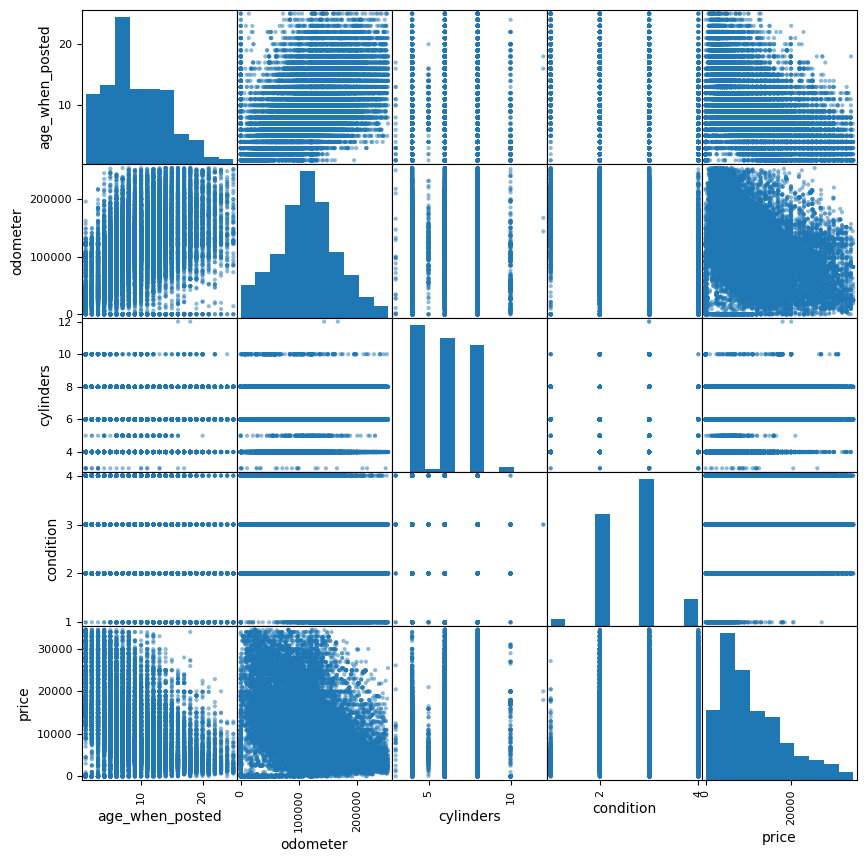

In [88]:
# Ahora verifiquemos lo que vemos en la matriz de correlación con una matriz de dispersión 
pd.plotting.scatter_matrix(popular_catg[['age_when_posted','odometer','cylinders','condition','price']], figsize=(10,10))
plt.show()

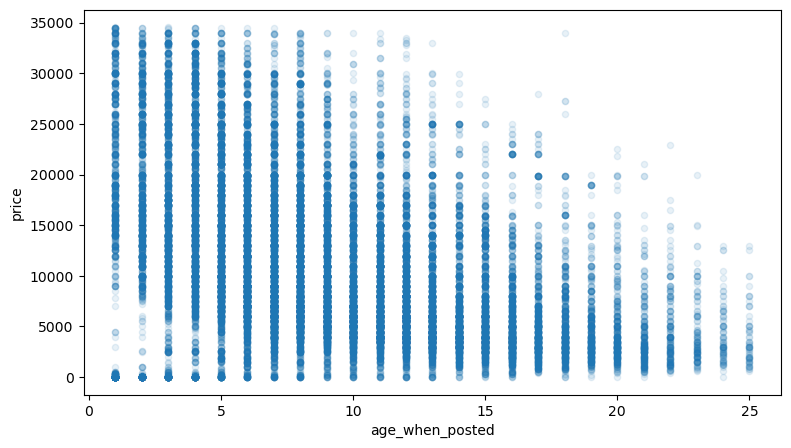

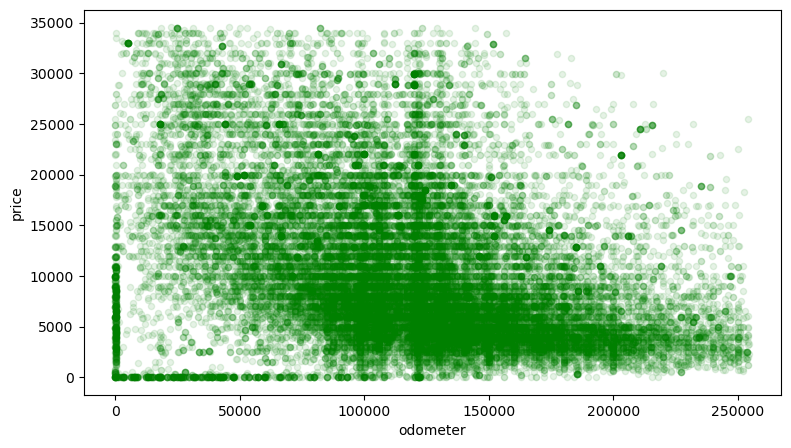

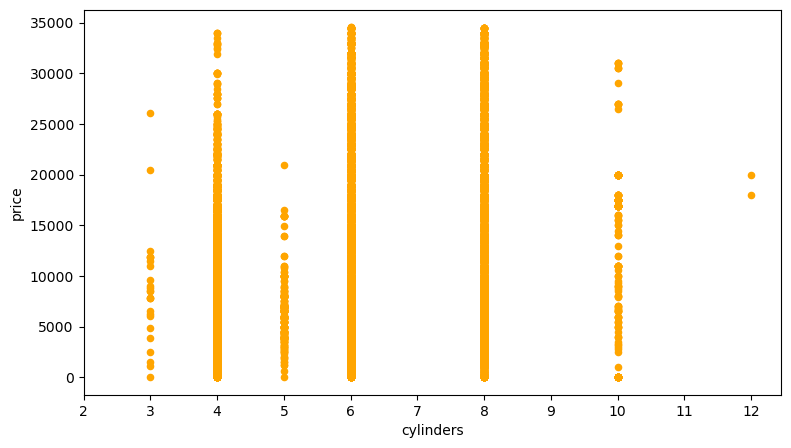

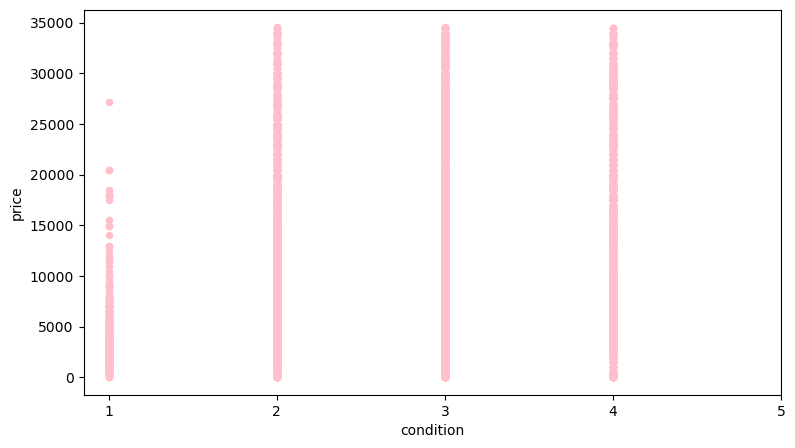

In [89]:
# Dado que solo me interesa 1 fila de esa matriz, vamos a ver solo esos gráficos y los dejemos un poco más lindos
# Primero el de edad
popular_catg.plot(x= 'age_when_posted',y= 'price', alpha= 0.1, kind= 'scatter',figsize= (9,5)) 
plt.show()

# De ahí el de millaje
popular_catg.plot(x= 'odometer',y= 'price', alpha= 0.1, kind='scatter',color='green',figsize= (9,5)) 
plt.show()

# Ahora los cilindros
popular_catg.plot(x= 'cylinders',y= 'price', kind='scatter',color='orange',figsize= (9,5)) 
plt.xticks(range(2,13))
plt.show()

# Finalmente la condicion
popular_catg.plot(x= 'condition',y= 'price', kind='scatter',color='pink',figsize= (9,5))
plt.xticks(range(1,6))
plt.show()

Ahora con ésto gráficos si podemos observar mejor lo reflejado en la matriz de correlación y notar con más claridad cuales de los parámetros presentan más relación con el precio.
  
Tambien podemos notar a mayor nivel de detalle como los `cylinders` 3 y 5 poseen un menor precio en general aunque tambien una menor cantidad de publicaciones. Es entendible que vehículos con una cantidad de cilindros más rara se vendan más baratos pues el comprador habitual no tendrá el nivel de confianza en algo que desconoce, lo que causa que los vendedores tengan que bajar más y más sus precios para efectivamente lograr vender sus vehículos.
  
Algo que no se veía en la matriz o el diagrama total, es que en el caso de `condition` vemos clara y obviamente que los vehículos de condición 1 (salvage) tienen precios mucho más bajos que todas las otras categorías. Por lo tanto podemos darnos cuenta que la condicion si inflye en el precio, pero únicamente en el caso de la última (o primera) categoría.

In [90]:
# Primero verifiquemos si todas las categorias cumplen con la condicion de tener al menos 50 publicaciones
popular_catg[['transmission','price']].groupby('transmission').count()

,price
transmission,
automatic,32904
manual,1401
other,480


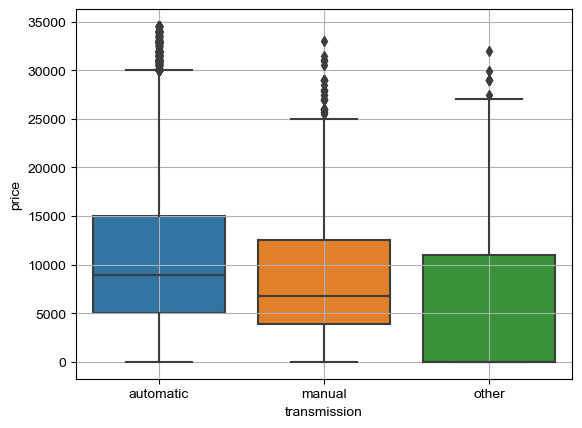

In [91]:
# De ahí revisamos con unas cajas y bigotes
sns.boxplot(x="transmission", y="price", data=popular_catg)
sns.set(rc={"figure.figsize":(10, 7)})
plt.grid()
plt.show()

Que podemos ver acá? Primero, que la mayoría de los vehículos publicados en la página son automáticos y por encima de eso notamos como tanto la mediana de los automáticos como el bigote superior se ubican respectivamente por encima de los mismos valroes de las otras categorías.
  
Personalmente desconozco que tipo de transmisión sera *other* pero notamos como su caja se ubica por debajo de las demas incluso cerca del 0 dandonos a entender que esos vehículos tienden a tener un precio menor al resto.
  
Finalmente vemos a *manual* justo en el medio pero con una cantidad mucho menor a *automatic*. Por lo tanto si bien podemos decir que el tipo de transmisión influencia al precio del vehículo tampoco es un factor determinante.

In [92]:
# Ahora vamos a ver lo mismo pero del color
# Primero verificar cuales categorías no entran en nuestro análisis
popular_catg[['paint_color','price']].groupby('paint_color').count().sort_values('price')

,price
paint_color,
purple,74
yellow,131
orange,135
brown,830
green,863
custom,881
red,2737
blue,3035
grey,3587


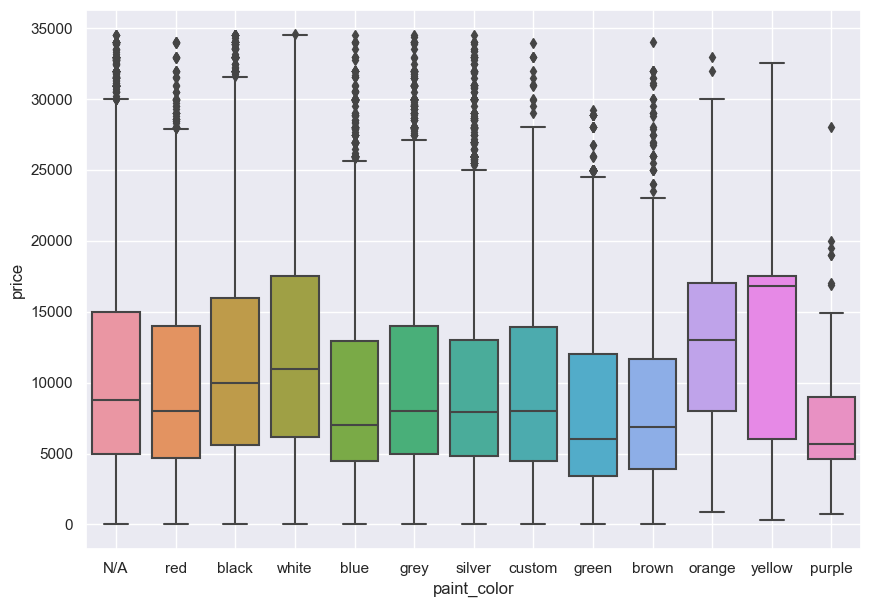

In [93]:
# Para nuestra suerte todas las columnas cumplen con los requisitos
sns.boxplot(x="paint_color", y="price", data=popular_catg)
#sns.set(rc={"figure.figsize":(10,7)})
plt.grid(axis='x')
plt.show()

In [94]:
# Veamos tambien cuántos valores nulos en 'paint_color' quedaron... en proporción
100*6187/df0['paint_color'].isna().sum()

66.76378547534262

Como era de esperar, éste gráfico es difícil de digerir...
  
Pero se puede ver algo:
- **Blanco:** Es el color más común de todos por 500 publicaciones, tambien podemos notar como es el que más rango cubre con la mediana más alta dentro de las categorias "normales".
- **N/A:** Siendo que es la segunda categoría en terminos de cantidad, realmente indica que debemos mandar un reporte al equipo de Data Engineering para revisar bien que causó la presencia de tantos datos finales. Tambien podemos notar que terminamos con un 34% menos de los nulos originales, lo que es suficientemente proporcional a la diferencia entre `popular_catg` y `df0`. Así que podemos quedarnos tranquilos en que nuestro análisis de valores atípicos no agregó una cantidad llamativa de nulos.
  
De ahí vemos que el resto de los colores siguen una forma relativamente similar... casi ninguno desviandose del resto.
  
Digo casi ya que *orange, yellow y purple* tienen formas más llamativas. Al menos *yellow y purple*, pero también incluyo a *orange* ya que si vemos en el conteo general: esas 3 categorias se encuentran en las últimas 3 y por un buen margen. Es evidente que esa forma extraña se deriva en parte a la muestra tan chica que tienen. Aunque la forma de *yellow* me hace pensar en algo...
- **Yellow:** Cuando uno piensa en un auto amarillo piensa o en un escarabajo, o un auto deportivo y curiosamente los autos deportivos son caros y tienden a ser amarillos muchas veces. Aunque, no habíamos filtrado previamente los tipos para trabajar solo con *SUV, truck y sedan*? Si, pero tambien es común que las empresas automobilísticas tengan versiones deportivas de un mismo modelo. Eso ciertamente daría una buena explicación a que la mediana se encuentre por encima de todos los otros colores, aunque con una muestra tan baja solo quiero dejar ésto como un... pensamiento.

**Entonces, el color del auto influencia al precio?**
 
No podemos decir con certeza de que estén vinculados fuertemente, si bien se observa casos como el blanco y el amarillo; no podemos afirmar dado que al ver el gráfico no se vé ningún patrón fuertemente marcado y tristemente al ser una variable categórica el análisis estrícto que podemos realizar está limitado por ahora.

## <a id='toc9_1_'></a>[¿Que vende un coche?](#toc0_)
Finalmente llegamos a la pregunta que tanto buscamos contestar. Tras analizar la dependencia del precio a diferentes factores llegamos a una conclusión general y una hipótesis que no podemos contestar actualmente.
  
De todas las columnas que analizamos, podemos tener un grado de certeza de que el millaje y el año del vehículo influencian negativamente al precio del mismo, de manera que mientras más millas tenga el auto y/o sea más viejo; menor será el precio del mismo. También pudimos observar como la condición del vehículo influencia fuertemente el precio, pero únicamente en el caso de que el mismo se encuentre en un estado completamente destruido. 
  
Obviamente, tambien vimos una relación suficientemente destacable entre el millaje y el año del vehículo.
  
Por aparte tambien notamos una relación entre el precio y el tipo de transmisión. Si el vehículo es automático tiende a tener un precio más alto que manual y si el tipo de transmisión no es ninguna de esos dos el precio será altamente impactado de manera negativa.
  
Aparte de eso, penosamente, no podemos vincular ninguna otra columna al precio de manera fehaciente. Pero si podemos sacar unas conclusiones parciales siendo conscientes de nuestra ignorancia por la falta de datos, o como dicen podemos sacar conclusiones que hay que agarrar con pinzas. 
  
Los ejemplos de esos son:
- Un vehículo con una cilindrada impar como 3 o 5 tiende a tener un precio menor o mejor dicho no tienden a alcanzar precios muy altos.
- Un vehículo pintado de amarillo tiende a tener un precio más alto de lo normal, posiblemente causado porque los autos de ese color sean versiones deportivas o *full*.

  
Por lo tanto, el primer filtro para el precio de un vehículo más allá de su categoría, precio u año; es la condición o más precisamemte que no se encuentre destruido. De ahí hay una clara relación negativa entre el precio y tanto la edad del vehículo como el millaje del mismo. Finalmente destacaremos como un vehículo de transmisión automática lograría alcanzar un mayor precio que uno sin.

# <a id='toc10_'></a>[Conclusión general](#toc0_)

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]
  
Bueno, llegamos al final. Éste fue un largo trayecto con multiples altibajos y podemos sacar multiples conclusiones no solo respecto a la pregunta sino tambien respecto a los datos y sus errores.

**Valores ausentes**

Para empezar notamos una presencia notablemente alta de valores ausentes distribuidos a lo largo de multiples columnas. Lamentablemente no logramos encontrar un vínculo con alguna columna o valor en la fila... con una excepción siendo el caso del *mercerdes-benz sprinter 2500* en donde notamos un error absurdamente fuerte que causó una falta de valores en múltiples columnas y en casos como `odometer` no teníamos ningun valor en toda la categoría relacionada con ese auto.
  
En el caso de la columna `is_4wd` no podemos decir mucho pues si bien habían valores nulos, al ser una columna booleana no hubo  una perdida efectiva de información.
  
La situación de `odometer` si es más importante, pues hablamos de una columna que ayuda fuertemente a identificar un auto específico y diferenciarla de sus pares. Habría que buscar de que forma terminamos con un 15% de valores ausentes y evitar en ésta columna la presencia de nulos. Pues como notamos, el millaje tiene una influencia en el precio.
  
`model_year` también presentaba una presencia de valores ausentes, aunque menor. De todas formas, vale destacar que como vimos el año de un auto influencia el precio del mismo. Por lo que también hay que hacer incapié para evitar nulos acá y mandar el reporte al equipo de Data Engineering así éste error pasa a primera categoría junto con el caso de `odometer`.
  
Hay una categoría, que ahora con el análisis hecho, sabemos que no influye tanto en el precio pero que también tenemos que destacar por el simple volumen que tiene de ausentes. Esa es `paint_color`, con la mayor cantidad de pérdida de datos debido a los valores nulos y a un impacto absolutamente notable en nuestro análisis: el cual se vió reflejado en que el segundo "color" más común es N/A. Debemos buscar cuál fue la causa de tal cantidad de ausentes, aunque no con el mayor rigor pues podemos permitirnos algunos si los numeros bajan de magnitud.
  
Finalmente el caso de `cylinders` es el menos destacable de todos ya que si bien presentaron un número significativo de ausentes, el reemplazo de ellos no fue demasiado dificil y posiblemente con un estudio más riguroso, como considerar el tipo de gasolina o intersectar múltiples columnas, podemos reemplazar sus valores con facilidad.
  
Como vimos, para reemplazar los valores faltantes, tomamos las columnas que más creímos relacionadas y con el uso de la función *groupby* separamos nuestros datos a gusto y reemplazamos con la mediana, ya que desde el comienzo se notaba fácilmente la presencia de datos atípicos en toda la tabla.

**La pregunta, ¿fue respondida?**
  
En resumen, sí pero... hay que ser conscientes que las respuestas obtenidas solo aplican mayormente para *SUV, camiones y sedanes*. También hay que destacar que posiblemente vendría bien realizar un estudio separando vehículos de uso comercial/industrial como camiones, buses y vanes, de vehículos de uso civil general como SUV, sedanes, etc. o vehículos de lujo como coupes y convertibles.
  
Por supuesto, no estoy diciendo que nuestras conclusiones no sirvan para vehículos como un camión, pero si tengo en mente que no podemos sacar conclusiones muy profundas por la naturaleza de nuestro análisis y que con más tiempo, datos y trabajo podemos buscar responder la misma pregunta con multiples enfoques y detalles que ahora no.